In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_27_alphadia_mDIA_synchroPasef'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:01.060111  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_9ykh_nd2. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 170,704,465,920
0:00:01.071627  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:01.071951  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)


#test_lib.precursor_df.elution_group_idx = np.arange(len(test_lib.precursor_df))

In [3]:
test_lib.precursor_df.channel.value_counts()

0     91732
4     45867
8     45867
12    45867
Name: channel, dtype: int64

0:00:20.922019  PROGRESS:       _   _      _         ___ ___   _   
0:00:20.922910  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:20.923538  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:20.924011  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:20.924524  PROGRESS:            |_|                            
0:00:20.924997  PROGRESS: 
0:00:20.925770  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:20.932791  INFO: Applying config update from dict
0:00:20.933169  PROGRESS: version: 1.0.2
0:00:20.933363  PROGRESS: hostname: Georgs-MBP.fritz.box
0:00:20.933542  PROGRESS: date: 2023-05-03 17:43:30
0:00:23.605882  INFO: renaming precursor_columns columns
0:00:23.606393  INFO: renaming fragment_columns columns
0:00:23.606897  INFO: ========= Library Stats =========
0:00:23.607143  INFO: Number of precursors: 229,333
0:00:23.636920  INFO: 	thereof targets:183,468
0:00:23.637406

7850


  0%|          | 0/14029 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 14029/14029 [00:01<00:00, 8064.21it/s] 
0:09:12.409273  INFO: Scored 14029 candidates
0:09:12.414816  INFO: 0.35% of targets failed, 0.52% of decoys failed
0:09:12.717911  INFO: number of dfs in features: 1, total number of features: 13968


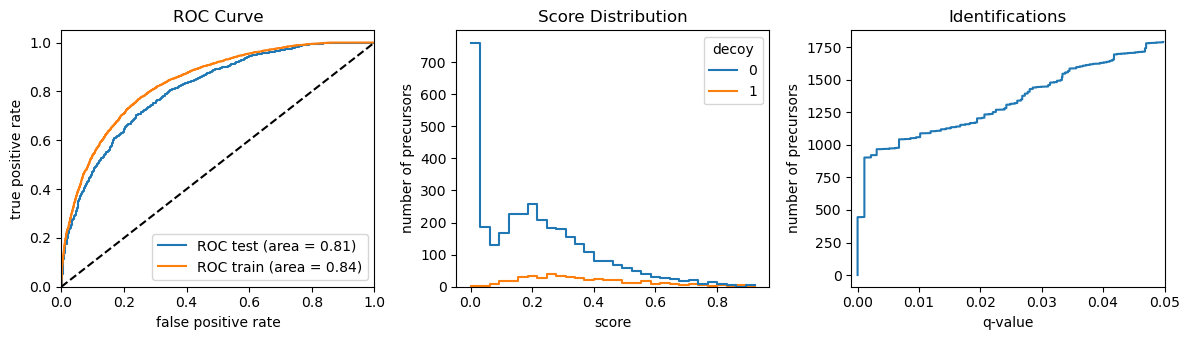

0:09:14.076702  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:09:14.078311  PROGRESS: Accumulated precursors: 3,915, 0.01 FDR: 1,060, 0.001 FDR: 446
0:09:14.079210  INFO: calibration group: precursor, fitting mz estimator 


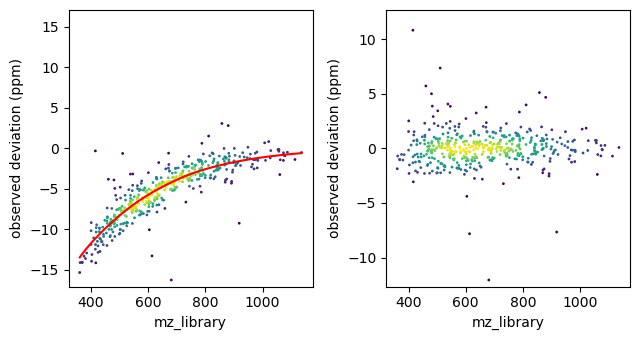

0:09:14.168271  INFO: calibration group: precursor, fitting rt estimator 


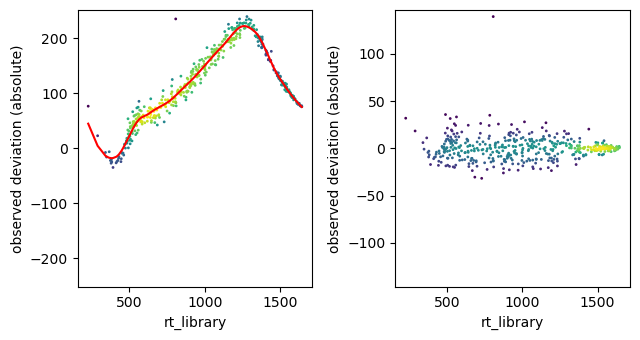

0:09:14.249932  INFO: calibration group: precursor, fitting mobility estimator 


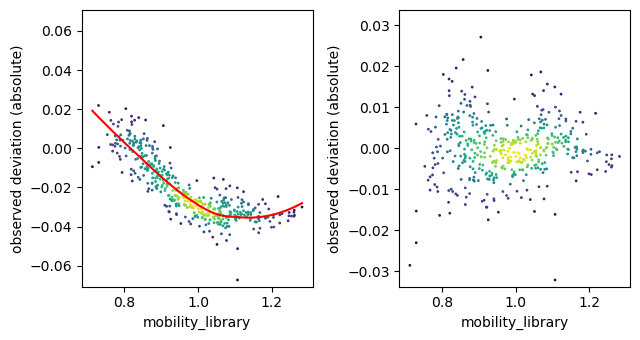

0:09:14.345459  INFO: calibration group: fragment, fitting mz estimator 


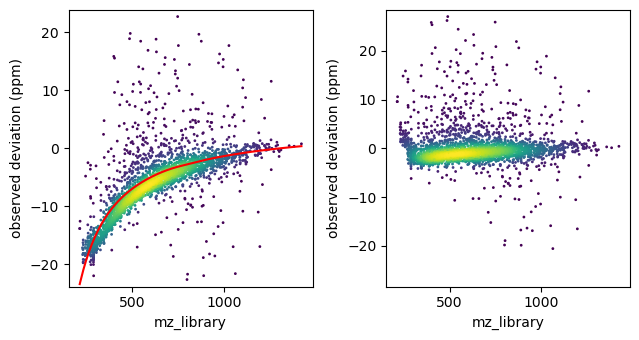

0:09:14.510391  INFO: calibration group: precursor, predicting mz
0:09:14.525426  INFO: calibration group: precursor, predicting rt
0:09:14.555528  INFO: calibration group: precursor, predicting mobility
0:09:14.566847  INFO: calibration group: fragment, predicting mz
0:09:14.868226  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:09:14.874878  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:09:14.876663  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:09:14.876963  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:09:14.877223  INFO: FWHM in RT is 4.49 seconds, sigma is 2.79
0:09:14.877496  INFO: FWHM in mobility is 0.012 1/K_0, sigma is 7.61


7814


100%|██████████| 13281/13281 [00:01<00:00, 10350.00it/s]
0:09:44.992169  INFO: Scored 13281 candidates
0:09:44.996613  INFO: 0.46% of targets failed, 0.60% of decoys failed
0:09:45.199661  INFO: number of dfs in features: 1, total number of features: 13211


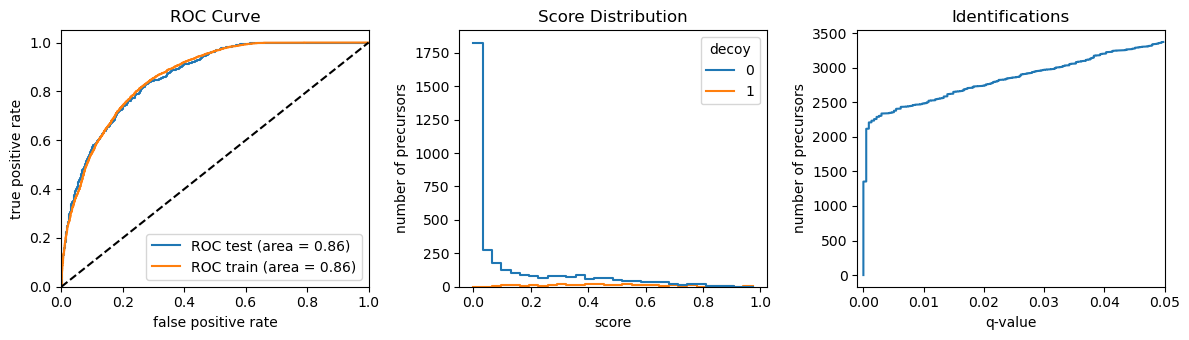

0:09:45.808157  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:09:45.808578  PROGRESS: Accumulated precursors: 3,884, 0.01 FDR: 2,482, 0.001 FDR: 2,209
0:09:45.810091  INFO: calibration group: precursor, fitting mz estimator 


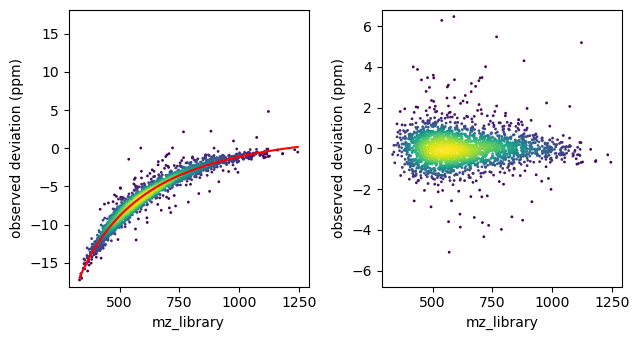

0:09:45.951571  INFO: calibration group: precursor, fitting rt estimator 


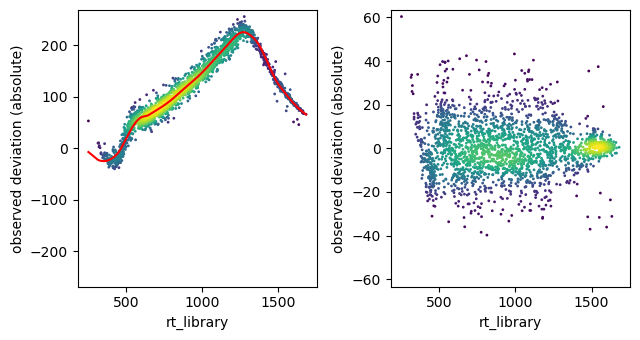

0:09:46.096543  INFO: calibration group: precursor, fitting mobility estimator 


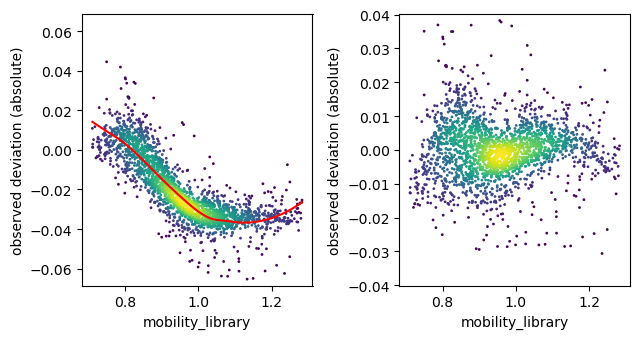

0:09:46.255052  INFO: calibration group: fragment, fitting mz estimator 


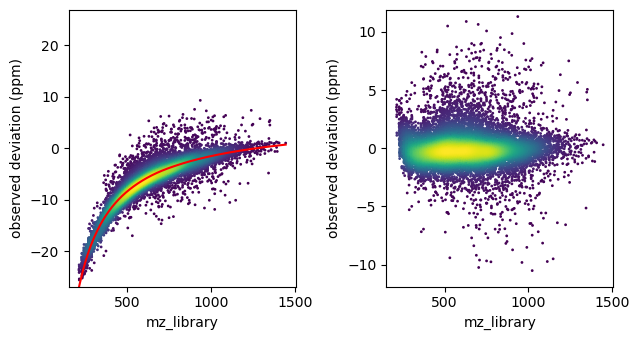

0:09:47.741429  INFO: calibration group: precursor, predicting mz
0:09:47.767340  INFO: calibration group: precursor, predicting rt
0:09:47.795925  INFO: calibration group: precursor, predicting mobility
0:09:47.808178  INFO: calibration group: fragment, predicting mz
0:09:48.124302  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:09:48.129206  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:09:48.130964  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:09:48.131259  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:09:48.131492  INFO: FWHM in RT is 4.04 seconds, sigma is 2.51
0:09:48.131729  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.13


7798


100%|██████████| 12976/12976 [00:01<00:00, 10382.53it/s]
0:10:17.108075  INFO: Scored 12976 candidates
0:10:17.113117  INFO: 0.44% of targets failed, 0.86% of decoys failed
0:10:17.302992  INFO: number of dfs in features: 1, total number of features: 12892


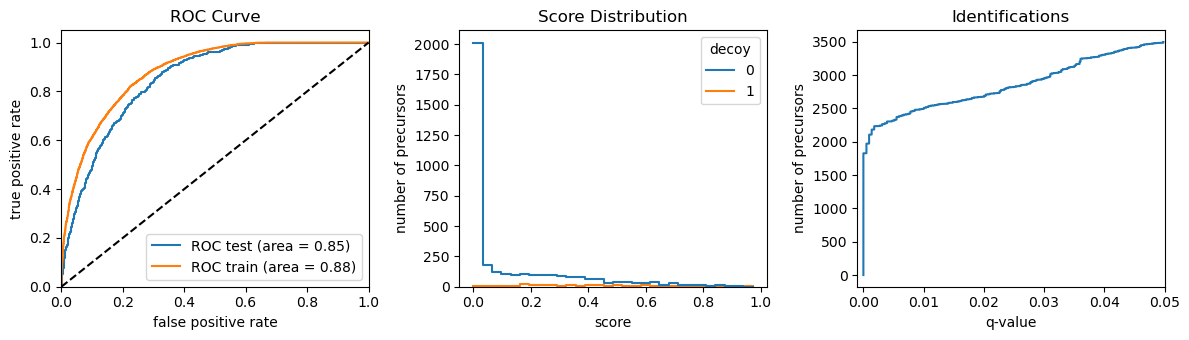

0:10:18.240125  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:10:18.240476  PROGRESS: Accumulated precursors: 3,877, 0.01 FDR: 2,494, 0.001 FDR: 2,108
0:10:18.241750  INFO: calibration group: precursor, fitting mz estimator 


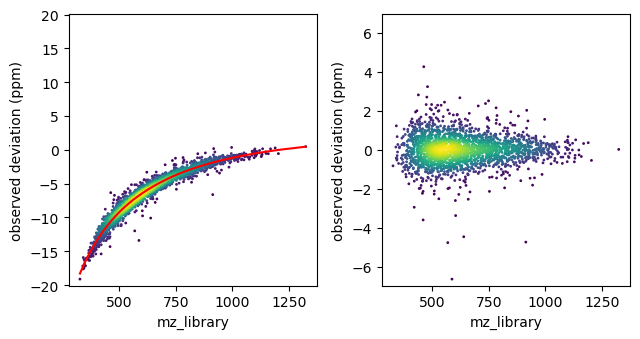

0:10:18.409291  INFO: calibration group: precursor, fitting rt estimator 


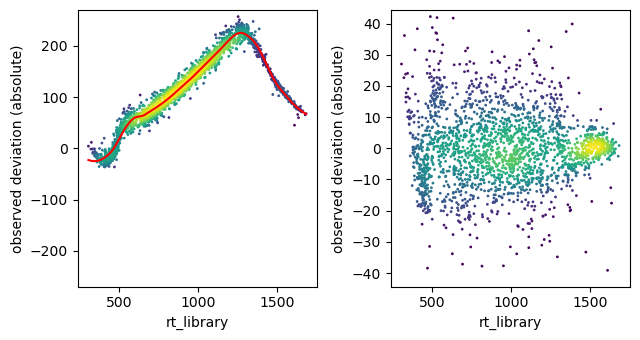

0:10:18.566769  INFO: calibration group: precursor, fitting mobility estimator 


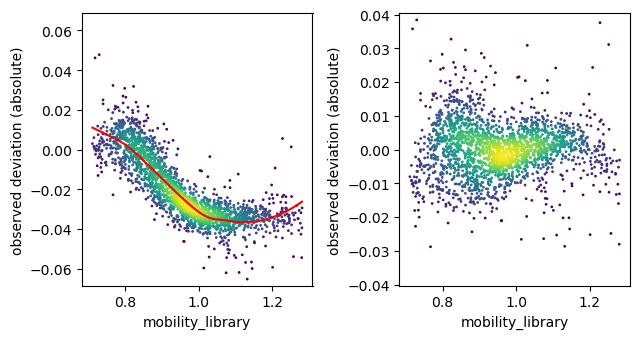

0:10:18.724964  INFO: calibration group: fragment, fitting mz estimator 


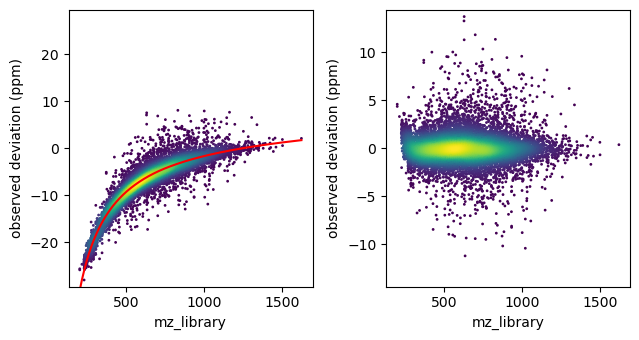

0:10:20.069863  INFO: calibration group: precursor, predicting mz
0:10:20.083738  INFO: calibration group: precursor, predicting rt
0:10:20.121173  INFO: calibration group: precursor, predicting mobility
0:10:20.136803  INFO: calibration group: fragment, predicting mz
0:10:20.447610  INFO: calibration group: precursor, predicting mz
0:10:20.458513  INFO: calibration group: precursor, predicting rt
0:10:20.488086  INFO: calibration group: precursor, predicting mobility
0:10:20.501723  INFO: calibration group: fragment, predicting mz


In [5]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)
for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

    workflow = Workflow(
        plan.config, 
        dia_data, 
        reference_flat, 
        fragments_flat
    )

    workflow.calibration()

0:10:20.887797  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:10:20.899995  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:10:20.900420  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:10:20.900630  INFO: FWHM in RT is 3.87 seconds, sigma is 2.41
0:10:20.900845  INFO: FWHM in mobility is 0.009 1/K_0, sigma is 6.02


91732


100%|██████████| 325502/325502 [00:32<00:00, 9943.43it/s] 
0:17:56.502060  INFO: Scored 325502 candidates
0:17:56.603896  INFO: 0.40% of targets failed, 0.64% of decoys failed


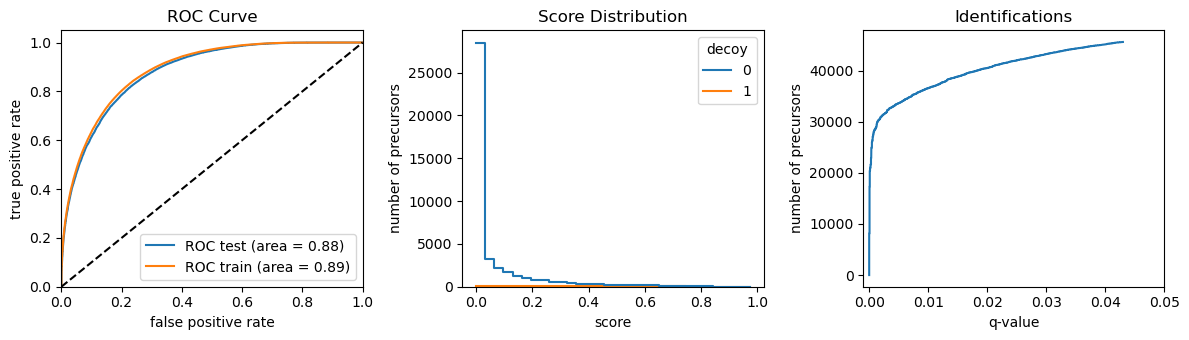

0:18:23.099193  PROGRESS: === extraction finished, 0.05 FDR: 43,715, 0.01 FDR: 36,186, 0.001 FDR: 28,499 ===


In [6]:
df_d0 = workflow.extraction()

In [7]:
df_d0[df_d0['qval'] <= 0.001]

precursor_idx  elution_group_idx  charge  rank  scan_start  scan_stop  \
256526         227978              36328       4     0         350        391   
91294          221844              12953       3     0         553        590   
299268         223932              42379       3     0         401        472   
298744         215195              42308       2     0         104        179   
57876          228434               8231       4     0         366        405   
...               ...                ...     ...   ...         ...        ...   
298761            376              42310       2     1         723        740   
176173         112398              24971       3     1         742        773   
151247          19627              21445       2     1         668        705   
234975          81190              33295       3     2         790        817   
53809           89698               7652       2     0         486        586   

        scan_center  frame_start  frame_stop  frame_center  ...   rt_library  \
256526          370         8194        8257          8224  ...   827.285867   
91294           571         5845        5932          5887  ...   608.433631   
299268          437        14332       14413         14371  ...  1508.473607   
298744          141        10180       10255         10216  ...  1035.862283   
57876           385        13825       13870         13846  ...  1360.950265   
...             ...          ...         ...           ...  ...          ...   
298761          731         6967        6994          6979  ...   691.059729   
176173          760        13381       13462         13426  ...  1277.169486   
151247          686         4453        4528          4489  ...   477.470689   
234975          803         6421        6508          6463  ...   653.459944   
53809           538         7165        7258          7216  ...   728.297683   

        rt_calibrated   rt_error  mobility_library  mobility_calibrated  \
256526     927.992395   7.993689          1.089667             1.053493   
91294      669.176164   1.008956          0.950775             0.927191   
299268    1629.054462   6.051129          1.035596             1.000864   
298744    1196.404217 -33.853680          1.231819             1.200048   
57876     1566.537068   8.849895          1.081993             1.046058   
...               ...        ...               ...                  ...   
298761     761.775301  32.610746          0.820371             0.819942   
176173    1502.158610  25.461385          0.824015             0.823008   
151247     482.792109  28.395391          0.831769             0.829489   
234975     717.221977  18.478402          0.768959             0.774821   
53809      806.268147  15.073833          0.982902             0.954032   

        mobility_error  proteins  channel         proba      qval  
256526        0.007283    Q8NC51        0  6.537099e-07  0.000000  
91294         0.003628  Q01844-3        0  1.132043e-06  0.000000  
299268        0.016593    P07437        0  1.409624e-06  0.000000  
298744        0.008788  P68363-2        0  1.428332e-06  0.000000  
57876         0.005020    O43169        0  1.563868e-06  0.000000  
...                ...       ...      ...           ...       ...  
298761        0.007429    Q9BQE3        0  3.210628e-02  0.000948  
176173       -0.014387  Q00653-4        0  3.211333e-02  0.000948  
151247        0.026977    Q13257        0  3.214637e-02  0.000982  
234975        0.005998  Q96T37-2        0  3.215211e-02  0.000982  
53809        -0.001877    O75390        0  3.215489e-02  0.000982  

[28499 rows x 53 columns]

In [8]:
workflow.calibration_manager.predict(precursors_flat, 'precursor')
workflow.calibration_manager.predict(fragments_flat, 'fragment')


0:18:50.021480  INFO: calibration group: precursor, predicting mz
0:18:50.045762  INFO: calibration group: precursor, predicting rt
0:18:50.103806  INFO: calibration group: precursor, predicting mobility
0:18:50.129874  INFO: calibration group: fragment, predicting mz


In [9]:
df_d0.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_d0.tsv', index=False, sep='\t')


In [10]:
precursors_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_precursors_flat.tsv', index=False, sep='\t')
fragments_flat.to_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804_fragments_flat.tsv', index=False, sep='\t')


In [11]:
from alphadia.extraction import hybridselection, scoring, quadrupole

In [31]:
precursors_flat.columns

Index(['elution_group_idx', 'precursor_idx', 'decoy', 'flat_frag_start_idx',
       'flat_frag_stop_idx', 'charge', 'rt_library', 'mobility_library',
       'mz_library', 'sequence', 'genes', 'proteins', 'channel', 'i_0', 'i_1',
       'i_2', 'i_3', 'i_4', 'i_5', 'nAA', 'raw_name', 'mz_calibrated',
       'rt_calibrated', 'mobility_calibrated'],
      dtype='object')

In [13]:
from alphadia.extraction import validate
class Multiplexer():

    def __init__(self,
        precursors_flat: pd.DataFrame,
        fragments_flat: pd.DataFrame,
        psm_df: pd.DataFrame
        ) -> None:

        self.precursors_flat = precursors_flat
        self.fragments_flat = fragments_flat
        self.psm_df = psm_df

    def __call__(self):
        # make sure input psm's have all required columns
        self.psm_df = self.psm_df[self.psm_df['decoy'] == 0].copy()
        anchor_ids = self.psm_df[['elution_group_idx', 'scan_start' ,'scan_stop', 'scan_center', 'frame_start', 'frame_stop', 'frame_center','rank']]
        
        candidates_df = self.precursors_flat[(precursors_flat['decoy'] == 0)]
        candidates_df = candidates_df[candidates_df['elution_group_idx'].isin(anchor_ids['elution_group_idx'])]
        candidates_df = candidates_df[['precursor_idx', 'elution_group_idx', 'channel', 'decoy','flat_frag_start_idx','flat_frag_stop_idx','charge']]

        candidates_df = candidates_df.merge(anchor_ids, on='elution_group_idx', how='outer')
        candidates_df = candidates_df.sort_values('precursor_idx')
        validate.candidates(candidates_df)
        return candidates_df

In [29]:
df_d0.head(30000)['rank'].value_counts()

0    24010
1     3932
2     1423
3      513
4      122
Name: rank, dtype: int64

In [16]:
precursors_flat[precursors_flat['elution_group_idx'] == 14391][['elution_group_idx','precursor_idx','decoy','channel','sequence','mz_calibrated','charge']]

elution_group_idx  precursor_idx  decoy  channel    sequence  \
61276              14391          61507      1        0  SVRPGLSPSR   
61277              14391          61277      0        0  SIRPGLSPYR   
61505              14391          61276      0       12  SIRPGLSPYR   
61506              14391          61505      0        8  SIRPGLSPYR   
61507              14391          61506      0        4  SIRPGLSPYR   

       mz_calibrated  charge  
61276     361.874806       3  
61277     391.890695       3  
61505     395.914916       3  
61506     394.572171       3  
61507     393.232406       3

In [17]:
precursors_sample = precursors_flat[precursors_flat['precursor_idx'].isin([61277, 61507])]

In [18]:
precursors_sample

elution_group_idx  precursor_idx  decoy  flat_frag_start_idx  \
61276              14391          61507      1              2588507   
61277              14391          61277      0               182581   

       flat_frag_stop_idx  charge  rt_library  mobility_library  mz_library  \
61276             2588519       3  655.292295          0.770913  361.880490   
61277              182593       3  655.292295          0.770913  391.896142   

         sequence  ...       i_1       i_2       i_3       i_4       i_5  nAA  \
61276  SVRPGLSPSR  ...  0.330892  0.118996  0.030837  0.006372  0.001107   10   
61277  SIRPGLSPYR  ...  0.330892  0.118996  0.030837  0.006372  0.001107   10   

                                                raw_name  mz_calibrated  \
61276  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     361.874806   
61277  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     391.890695   

       rt_calibrated  mobility_calibrated  
61276      719.32546             0.776596  
61277      719.32546             0.776596  

[2 rows x 24 columns]

0:26:40.034287  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:26:40.034850  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:26:40.035162  INFO: FWHM in RT is 5.00 seconds, sigma is 1.87
0:26:40.035391  INFO: FWHM in mobility is 0.010 1/K_0, sigma is 13.14
0:26:40.037917  INFO: starting candidate selection


2


  0%|          | 0/2 [00:00<?, ?it/s]

plotting candidates: 61277


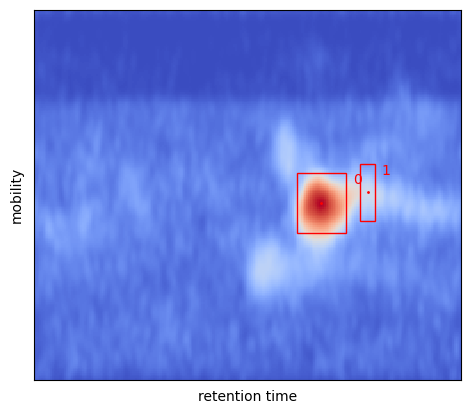

plotting candidates: 61507


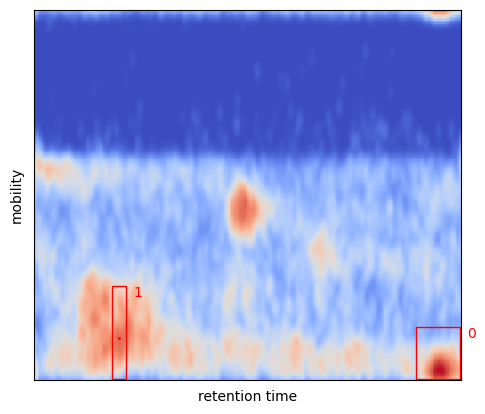

100%|██████████| 2/2 [00:00<00:00, 11.24it/s]


In [39]:
config = hybridselection.HybridCandidateConfig()
config.update(workflow.config['extraction']['HybridCandidateConfig'])
config.update({
    'rt_tolerance': 40,
    'mobility_tolerance': 0.07,
    'candidate_count': 1,
    'precursor_mz_tolerance': 10,
    'fragment_mz_tolerance': 15,
    'sigma_scale_mobility': 2.,
    'sigma_scale_rt': 0.3,
    'candidate_count': 2,
    'center_fraction': 0.5,
    'max_cardinality':10,
    
})

extraction = hybridselection.HybridCandidateSelection(
    dia_data,
    precursors_sample,
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    fwhm_rt = 5.,
    fwhm_mobility = 0.01,
    thread_count=10,
    debug=True
)
egs, candidates_df = extraction()

  0%|          | 0/4 [00:00<?, ?it/s]

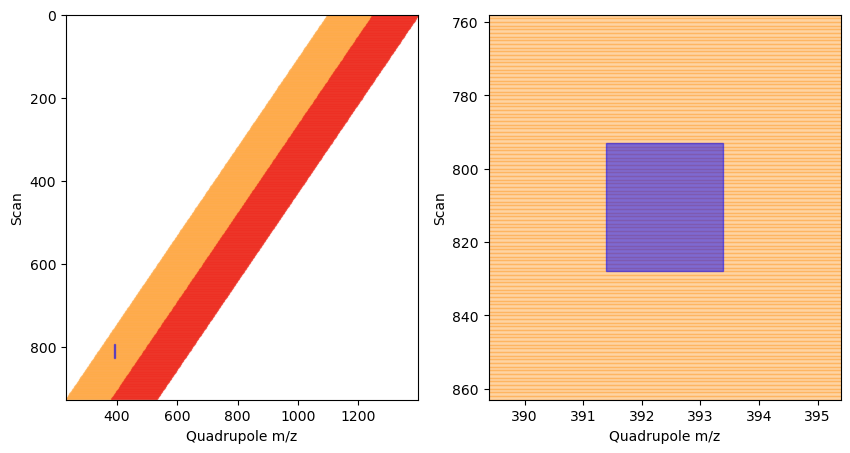

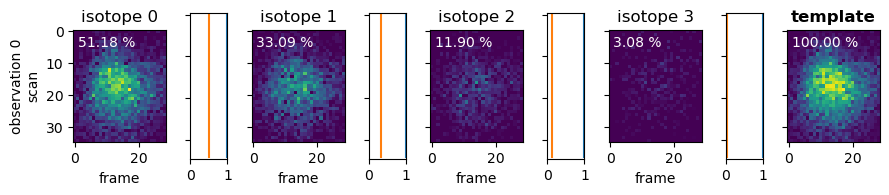

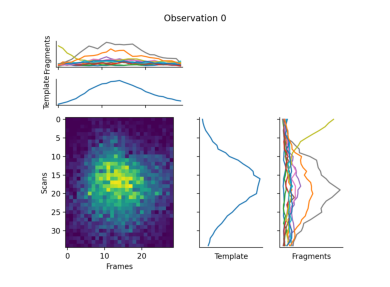

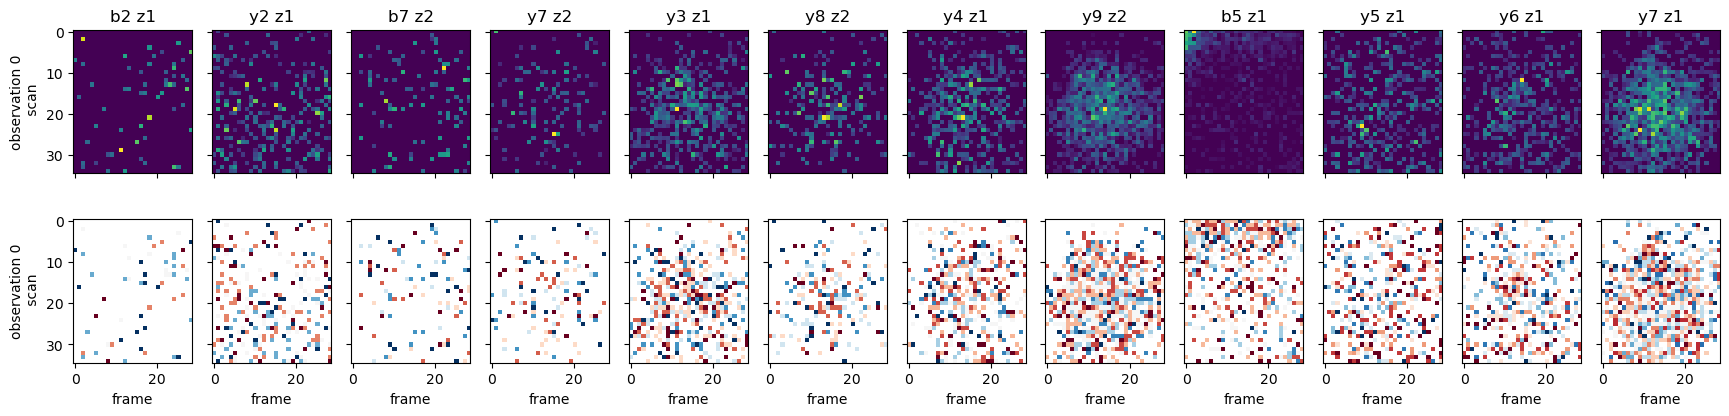

 25%|██▌       | 1/4 [00:03<00:10,  3.44s/it]

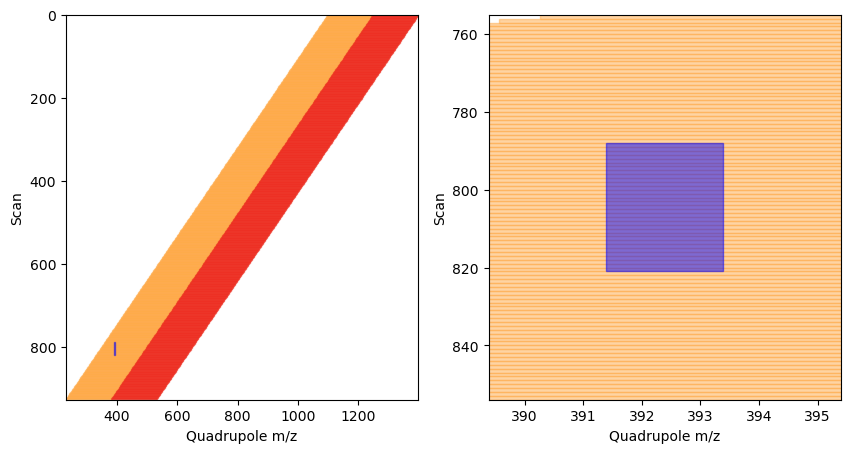

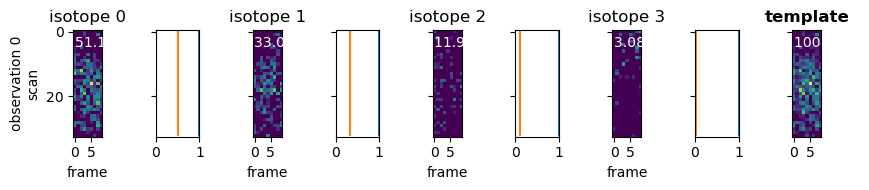

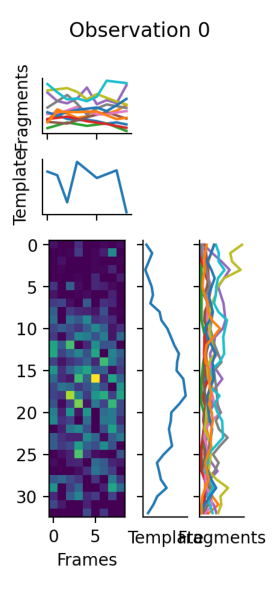

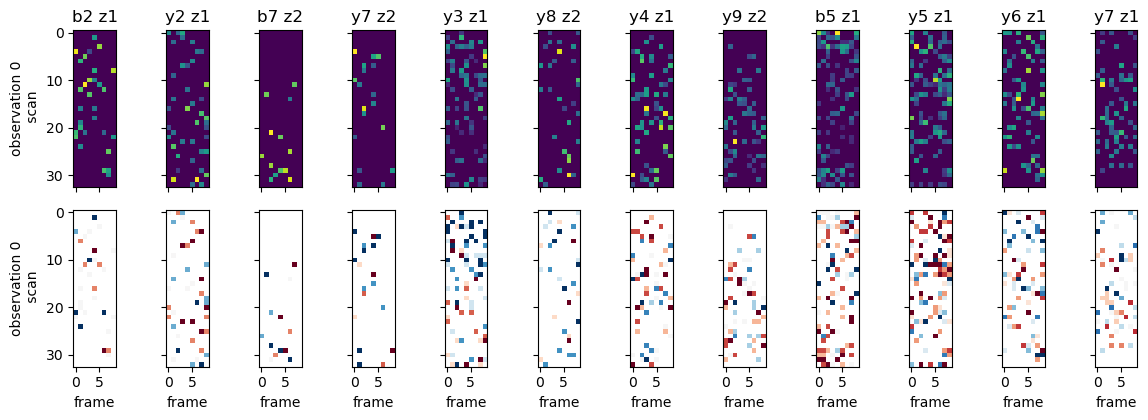

 50%|█████     | 2/4 [00:06<00:06,  3.19s/it]

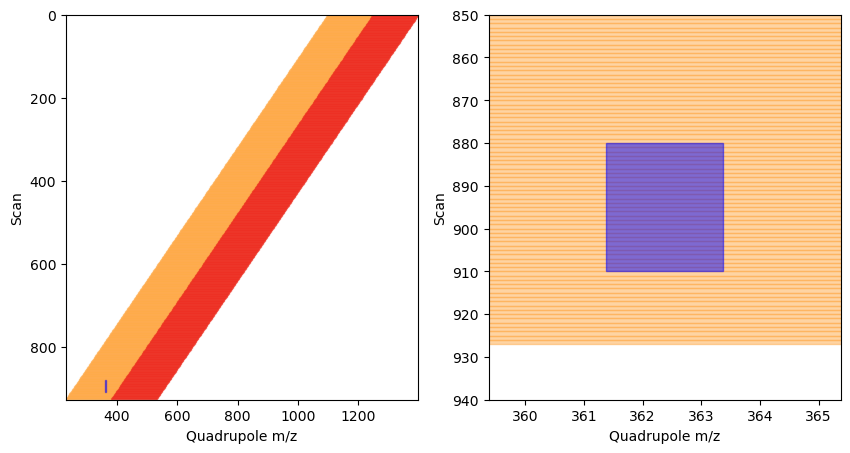

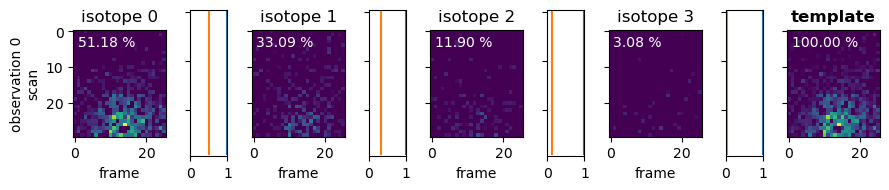

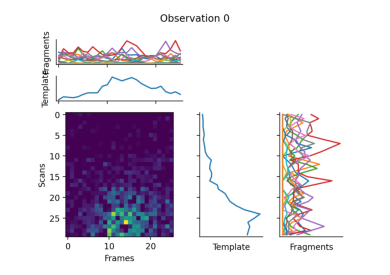

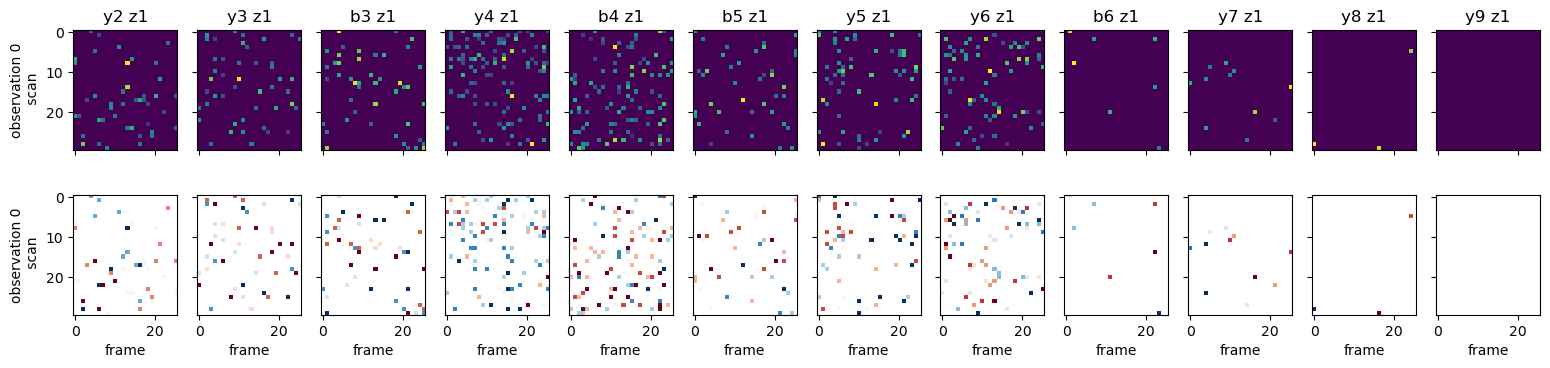

 75%|███████▌  | 3/4 [00:09<00:03,  3.16s/it]

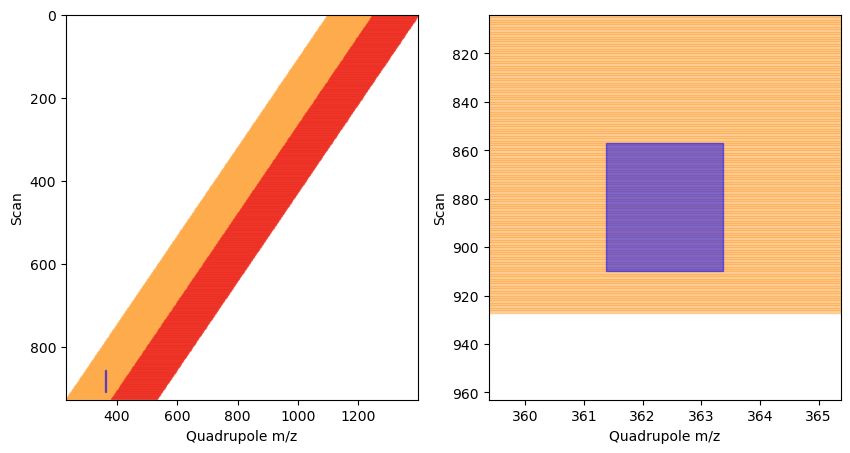

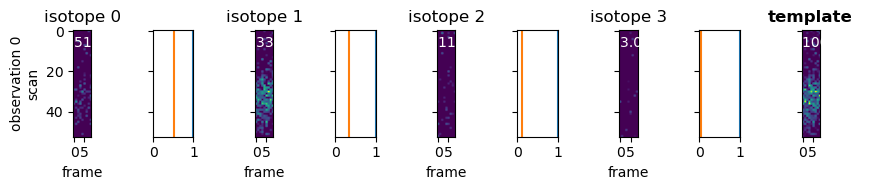

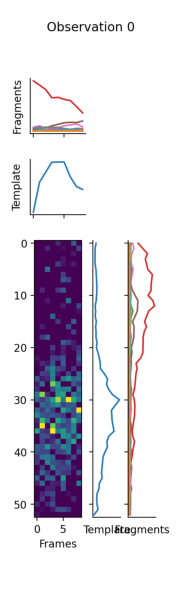

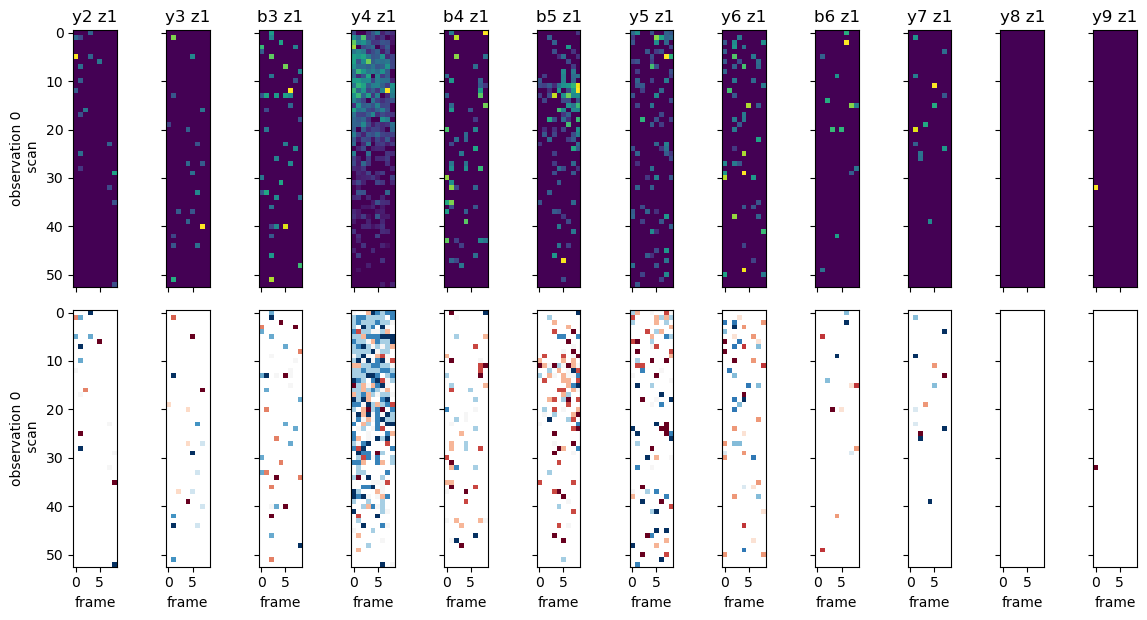

100%|██████████| 4/4 [00:00<00:00, 7420.26it/s]
0:26:55.616052  INFO: Scored 4 candidates
0:26:55.617375  INFO: 0.00% of targets failed, 0.00% of decoys failed


In [40]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    precursor_mz_tolerance=10,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
container, psm, fragments = scoring_workflow()

In [41]:
multiplex = Multiplexer(precursors_flat, fragments_flat, psm[psm['rank'] == 0].copy())
candidates_df = multiplex()

In [42]:
from alphadia.extraction import utils

In [43]:
candidates_df = utils.calculate_score_groups(candidates_df, True).copy()

In [44]:
candidates_df

precursor_idx  elution_group_idx  channel  decoy  flat_frag_start_idx  \
0          61276              14391       12      0              1928530   
1          61277              14391        0      0               182581   
2          61505              14391        8      0              1346547   
3          61506              14391        4      0               764564   

   flat_frag_stop_idx  charge  scan_start  scan_stop  scan_center  \
0             1928542       3         793        828          810   
1              182593       3         793        828          810   
2             1346559       3         793        828          810   
3              764576       3         793        828          810   

   frame_start  frame_stop  frame_center  rank  score_group_idx  
0         6409        6496          6451     0                0  
1         6409        6496          6451     0                0  
2         6409        6496          6451     0                0  
3         6409        6496          6451     0                0

In [45]:
fragments_exclusive = fragments_flat.copy()
fragments_exclusive.loc[fragments_exclusive['cardinality'] > 1, 'mz_calibrated'] = 0

In [ ]:
import numba as nb

In [ ]:
@nb.experimental.jitclass()
class ScoreGroupContainer:
    
        candidates: nb.types.ListType(Candidate.class_type.instance_type)
    
        def __init__(
                self, 
                candidates,
            ) -> None:

            self.candidates = candidates

        def __getitem__(self, idx):
            return self.candidates[idx]

        def __len__(self):
            return len(self.candidates)
        
import alphatims.utils

  0%|          | 0/4 [00:00<?, ?it/s]

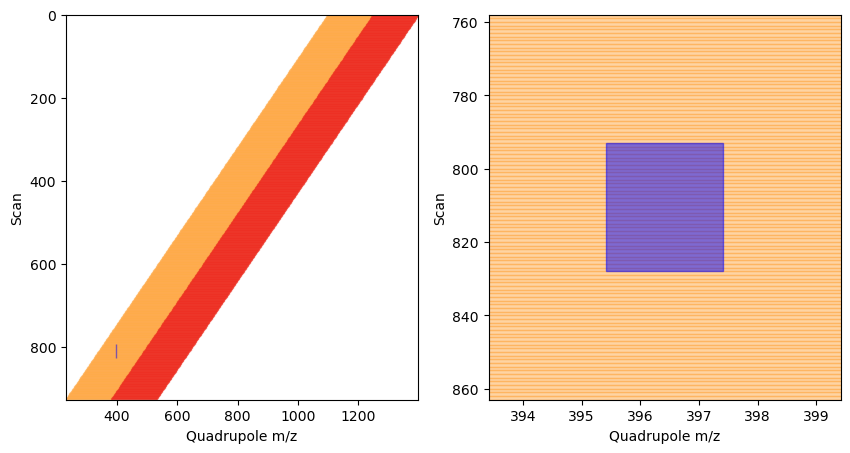

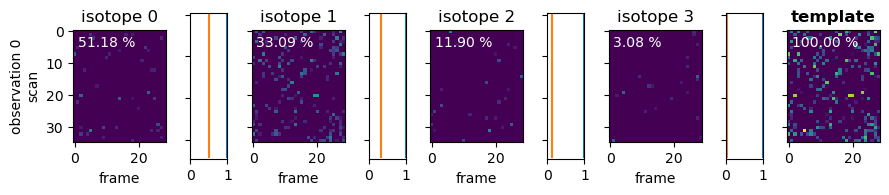

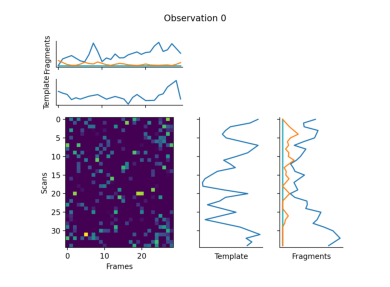

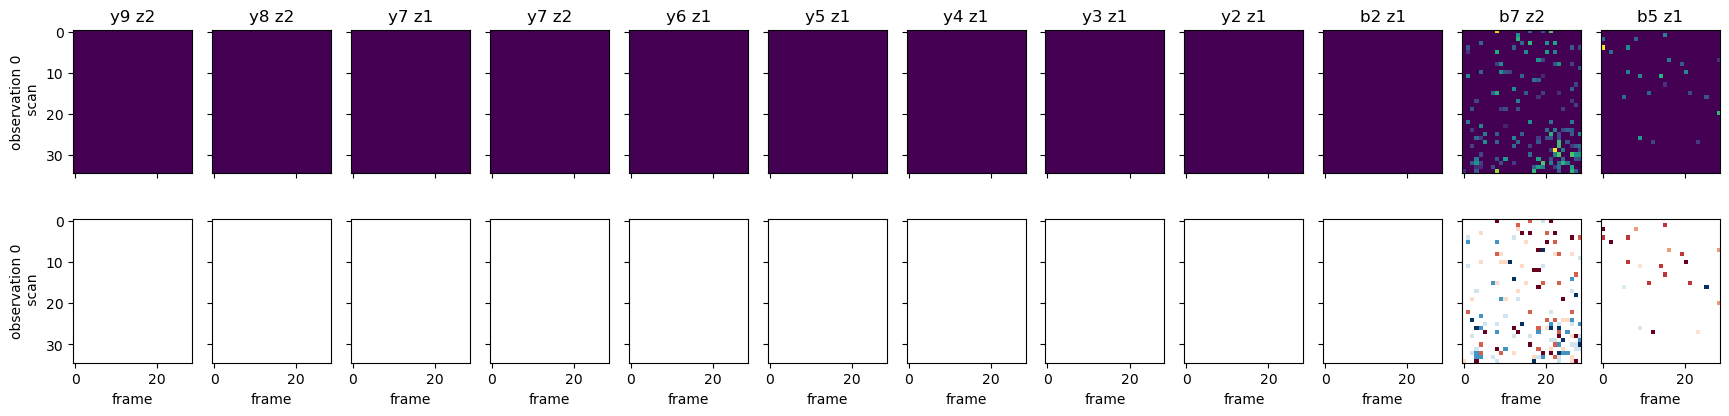

 25%|██▌       | 1/4 [00:02<00:08,  3.00s/it]

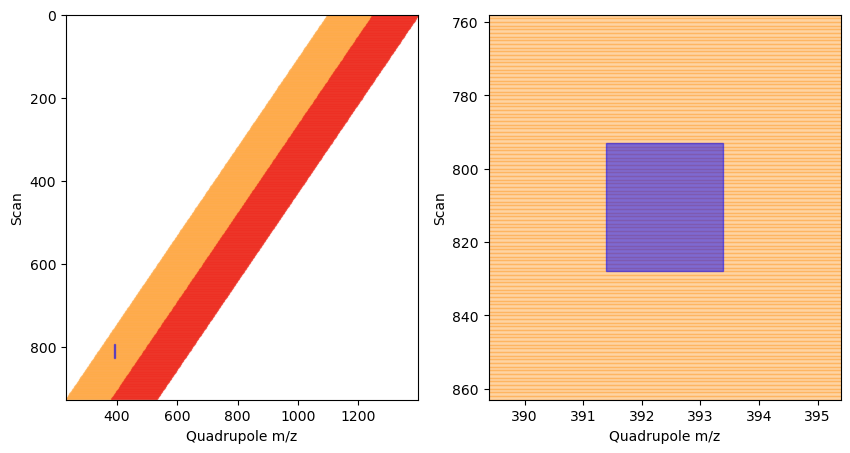

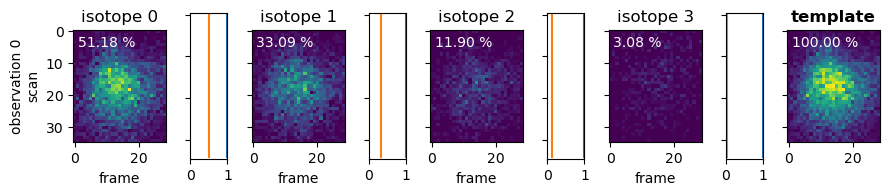

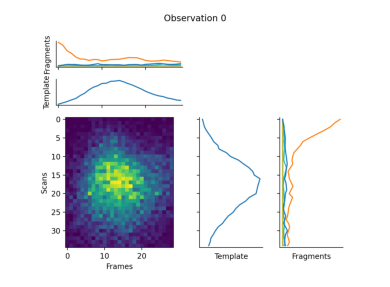

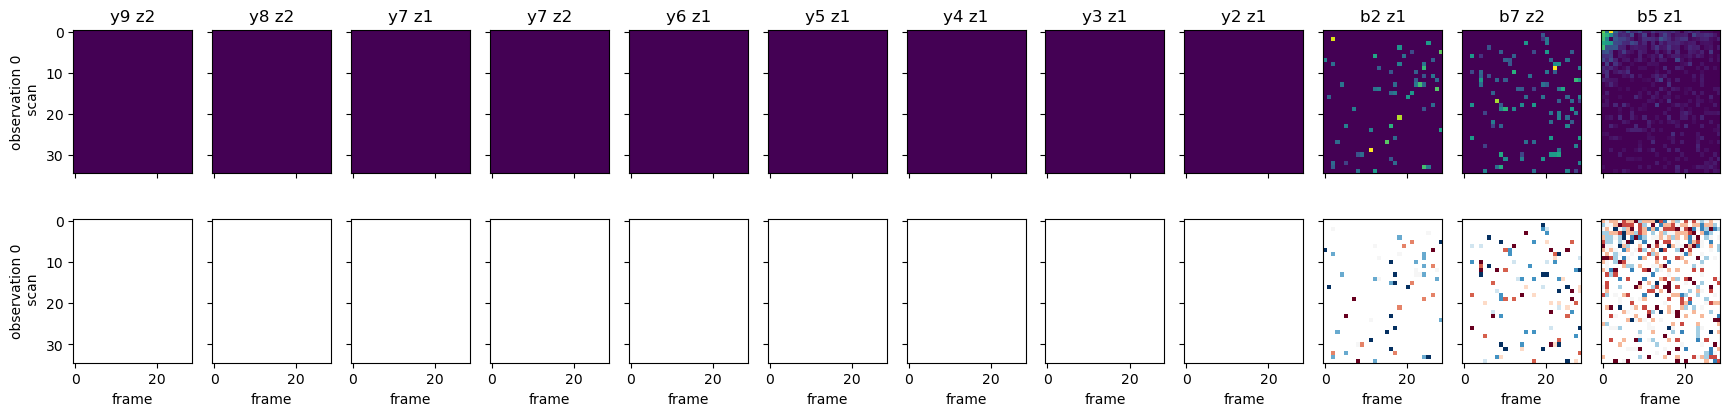

 50%|█████     | 2/4 [00:05<00:05,  3.00s/it]

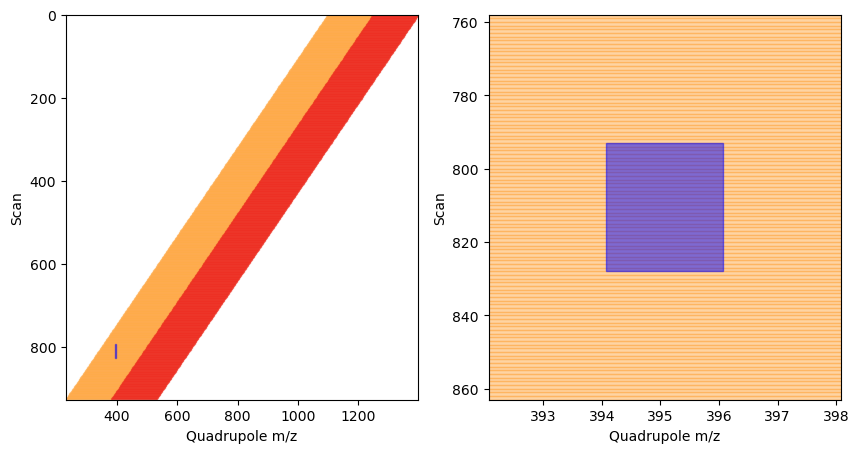

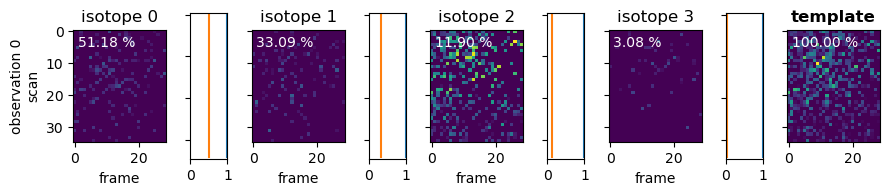

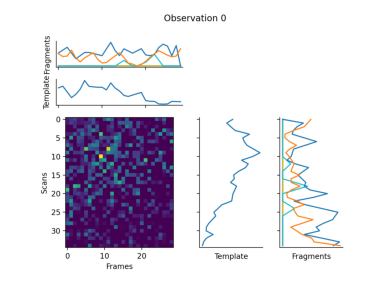

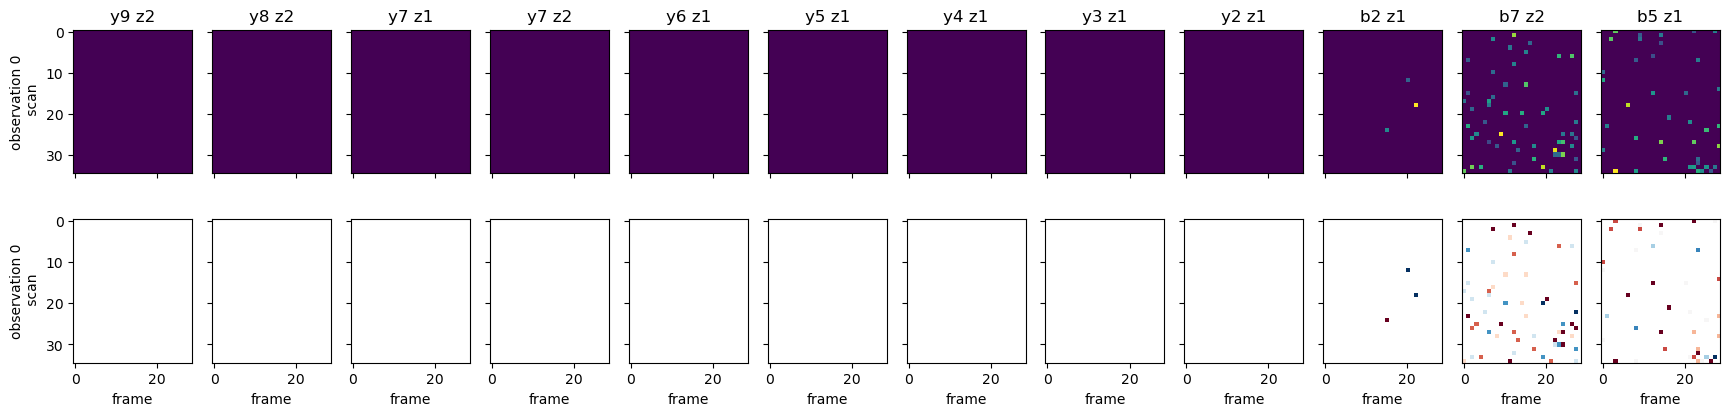

 75%|███████▌  | 3/4 [00:09<00:03,  3.05s/it]

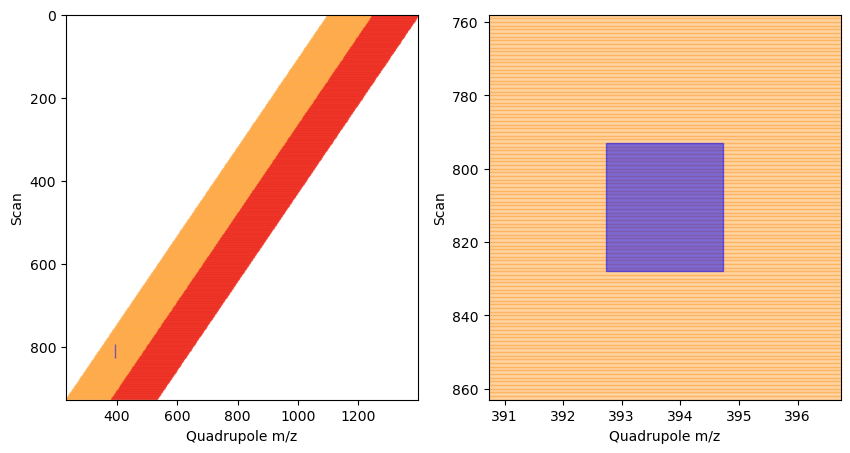

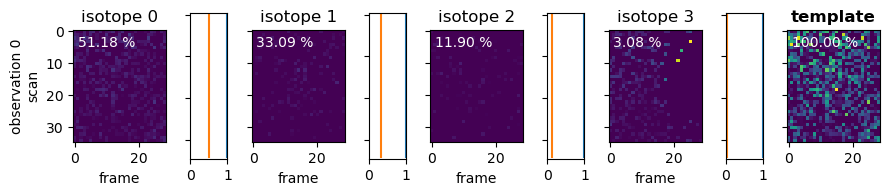

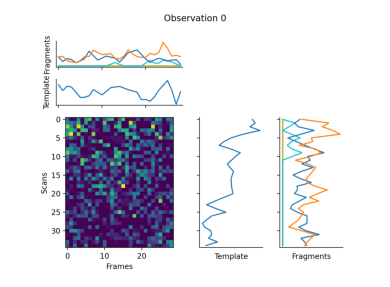

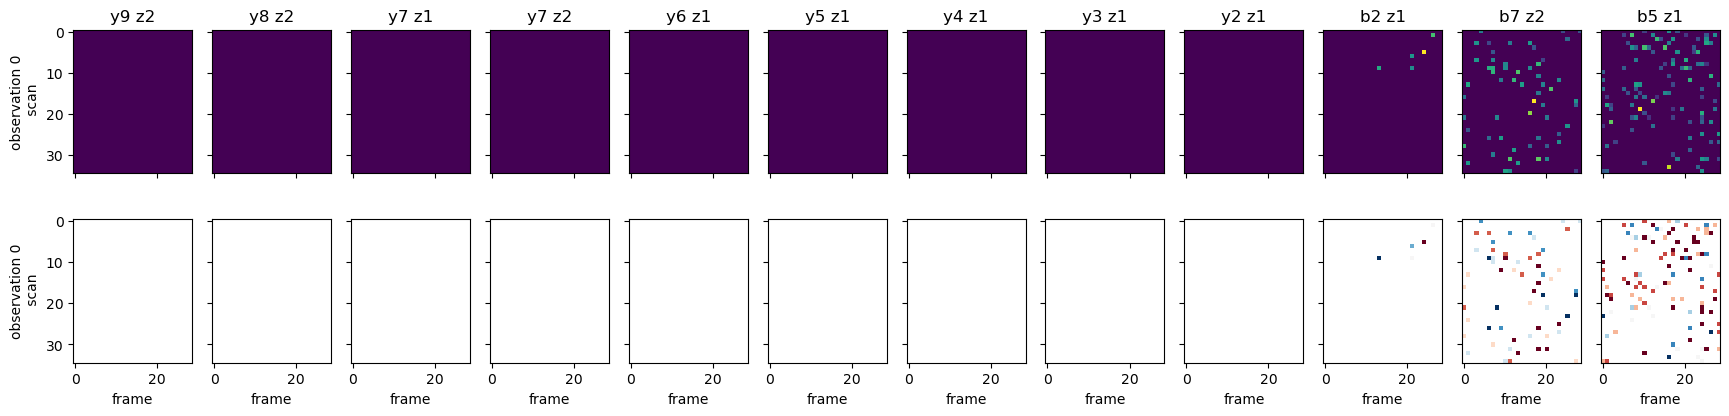

100%|██████████| 4/4 [00:00<00:00, 7543.71it/s]
0:27:36.884099  INFO: Scored 4 candidates
/Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/scoring.py:1236: RuntimeWarning: invalid value encountered in long_scalars
  decoy_percentage = 100 * df[df['decoy'] == 1].isna().any(axis=1).sum() / decoy_count
0:27:36.885552  INFO: 0.00% of targets failed, nan% of decoys failed


In [47]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_exclusive,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
container, psm, fragments = scoring_workflow()

In [49]:
container[0].

In [173]:
fragments_exclusive

mz_library  intensity  cardinality  type  loss_type  charge  number  \
0         628.377686   1.000000            4   121          0       1       6   
1         263.139008   0.015442            1    98          0       1       2   
2         541.345642   0.264511            4   121          0       1       5   
3         271.176453   0.030825            4   121          0       2       5   
4         345.224487   0.038848            4   121          0       1       3   
...              ...        ...          ...   ...        ...     ...     ...   
2909992  2087.022705   1.000000            1   121          0       1      18   
2909993  1985.974976   0.713498            1   121          0       1      17   
2909994  1928.953491   0.047048            1   121          0       1      16   
2909995  1829.885010   0.114307            1   121          0       1      15   
2909996  1714.858154   0.002081            1   121          0       1      14   

         position  mz_calibrated  
0               0       0.000000  
1               1     263.133179  
2               1       0.000000  
3               1       0.000000  
4               3       0.000000  
...           ...            ...  
2909992        28    2087.030518  
2909993        29    1985.981812  
2909994        30    1928.959717  
2909995        31    1829.890259  
2909996        32    1714.862305  

[2909997 rows x 9 columns]

  0%|          | 0/10 [00:00<?, ?it/s]

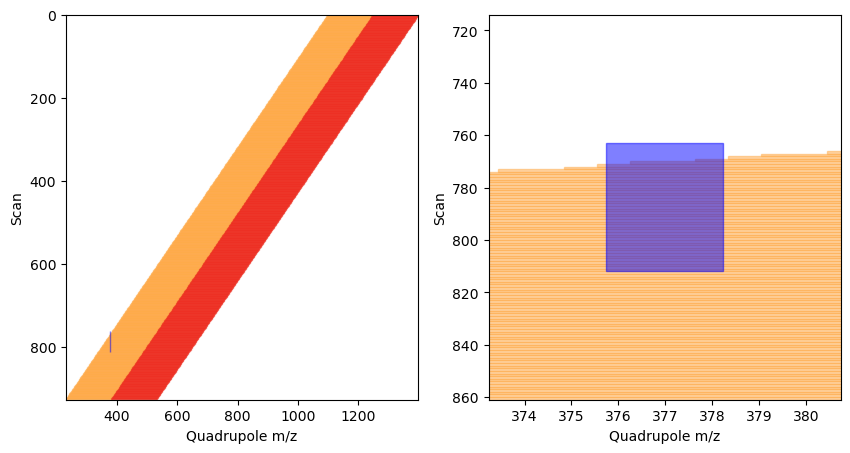

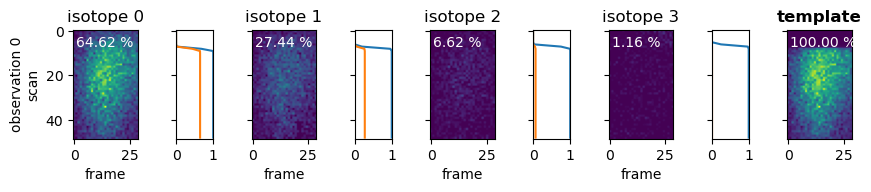

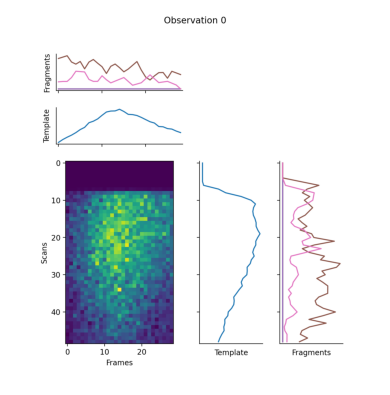

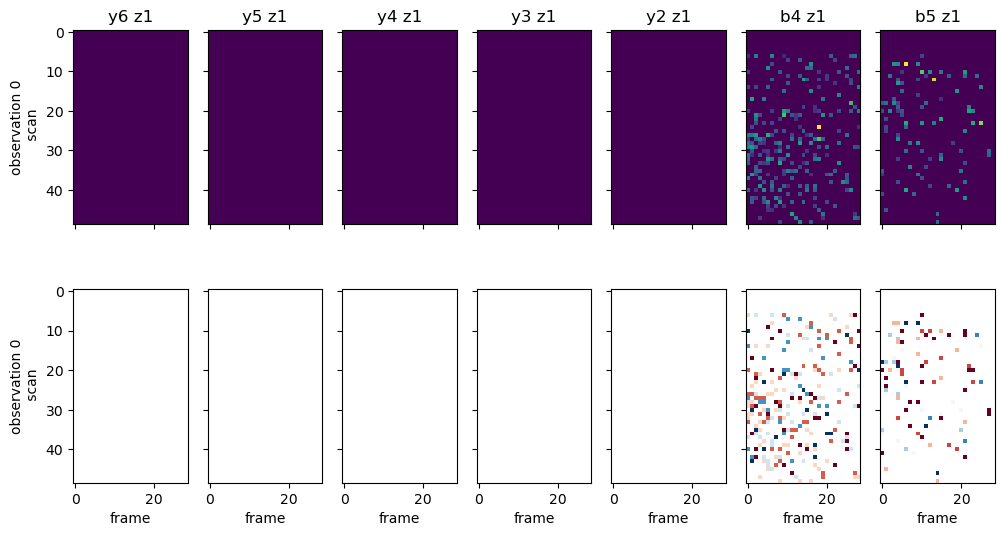

 10%|█         | 1/10 [00:03<00:29,  3.22s/it]

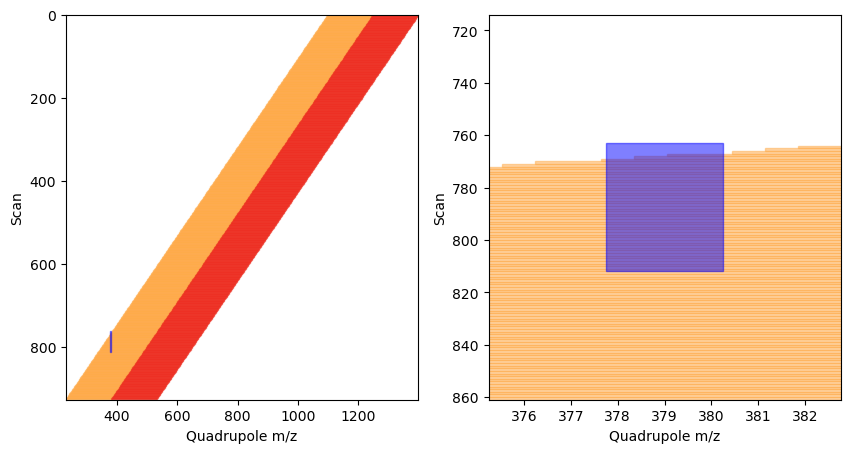

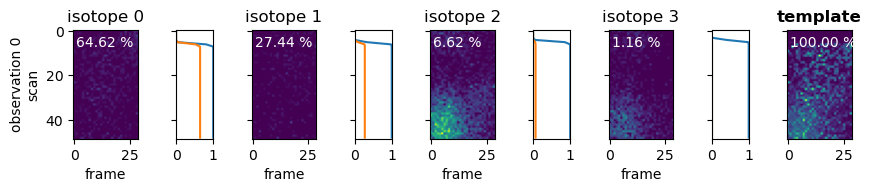

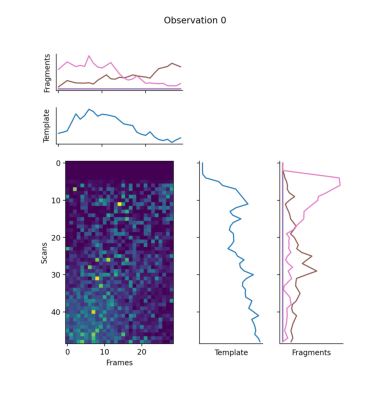

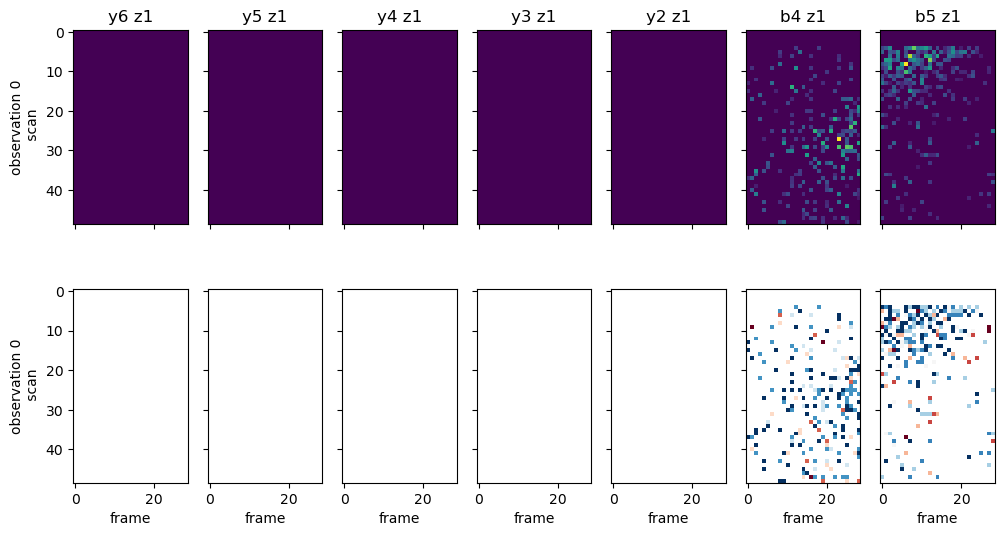

 20%|██        | 2/10 [00:06<00:26,  3.29s/it]

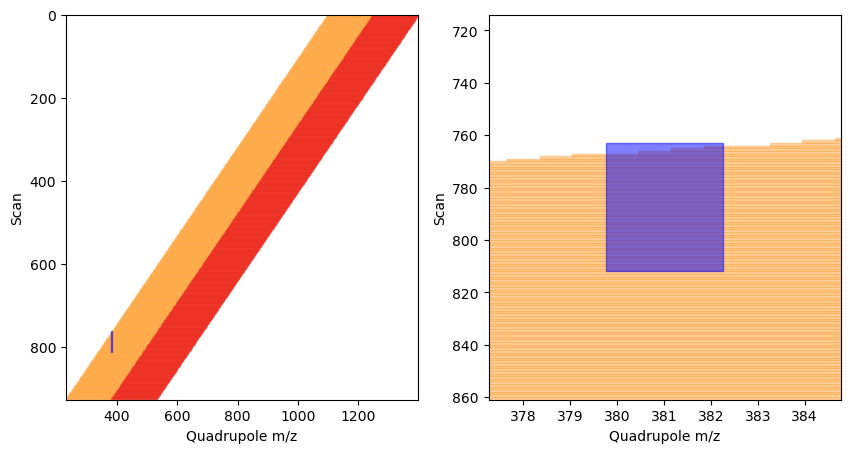

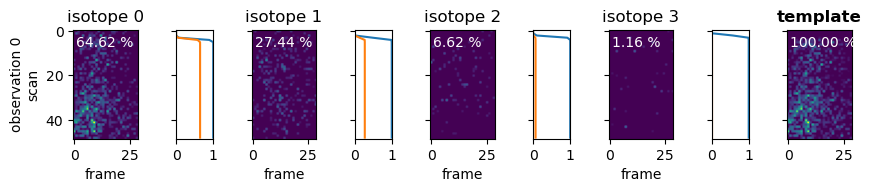

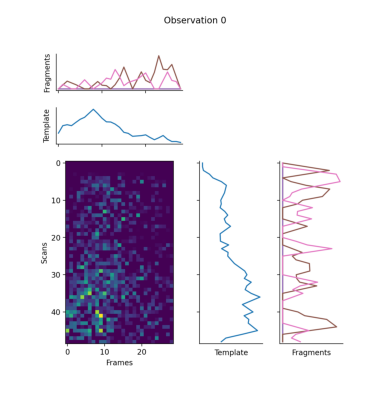

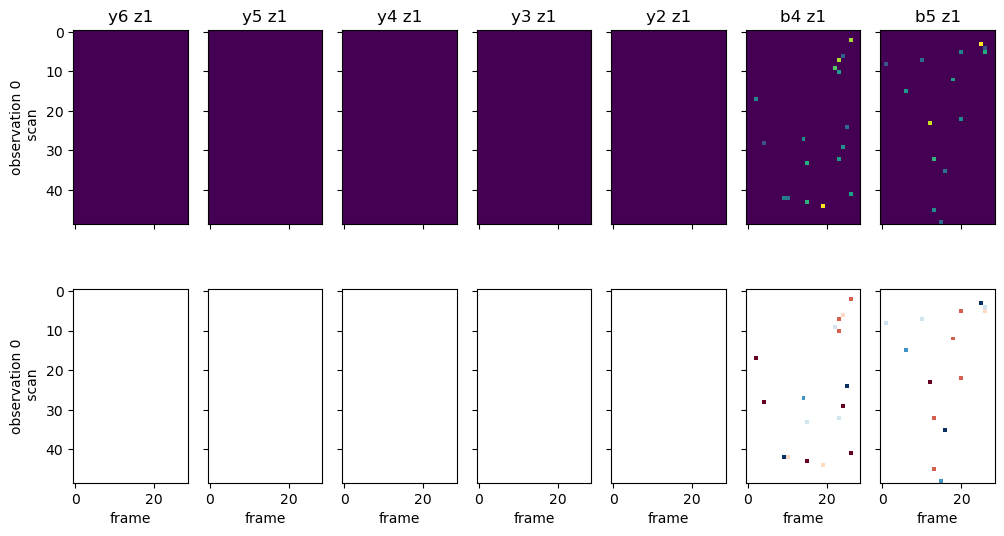

 30%|███       | 3/10 [00:09<00:20,  2.96s/it]

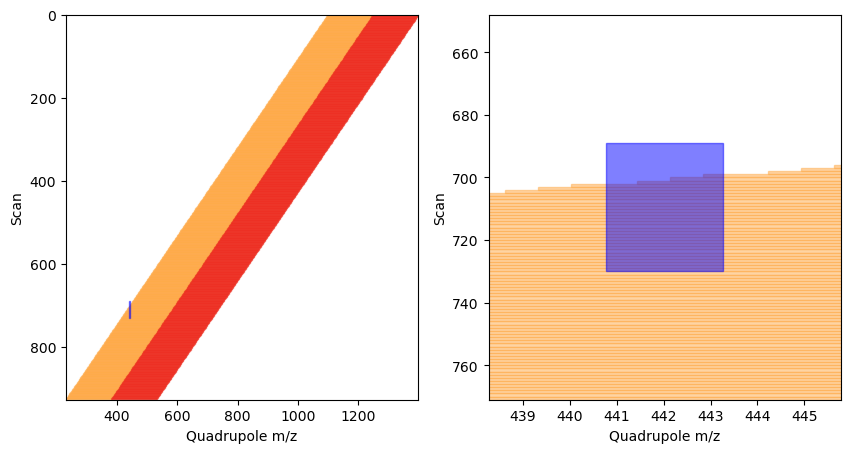

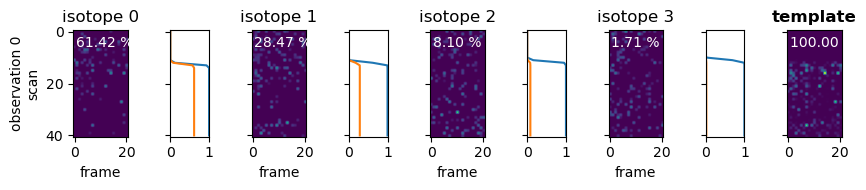

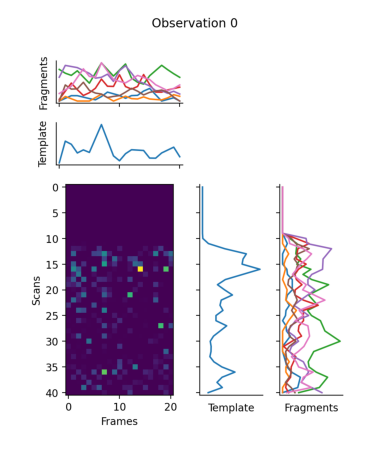

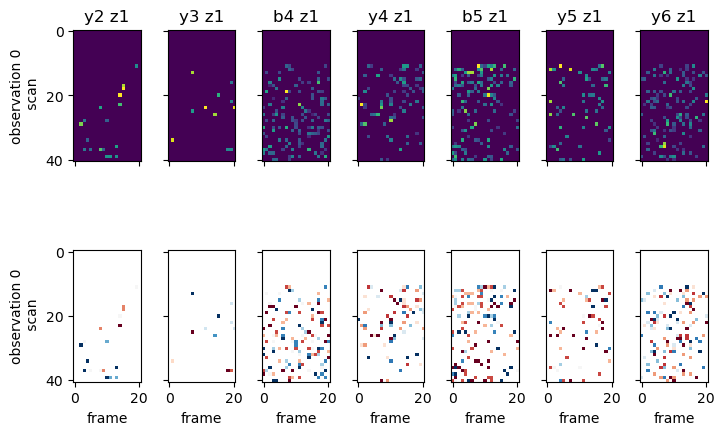

 40%|████      | 4/10 [00:12<00:18,  3.08s/it]

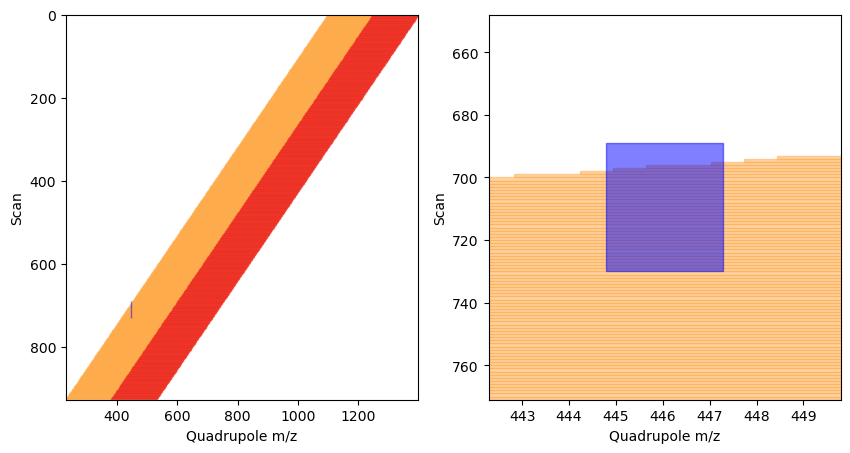

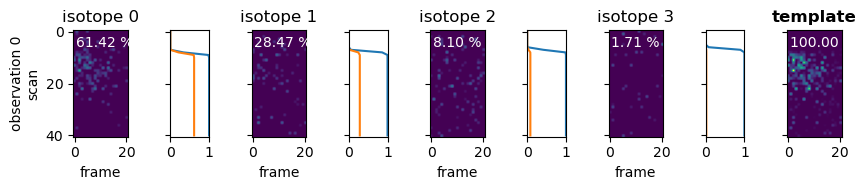

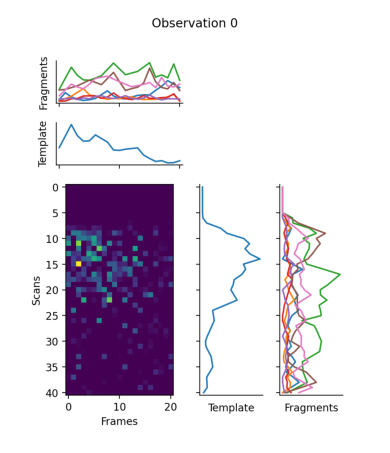

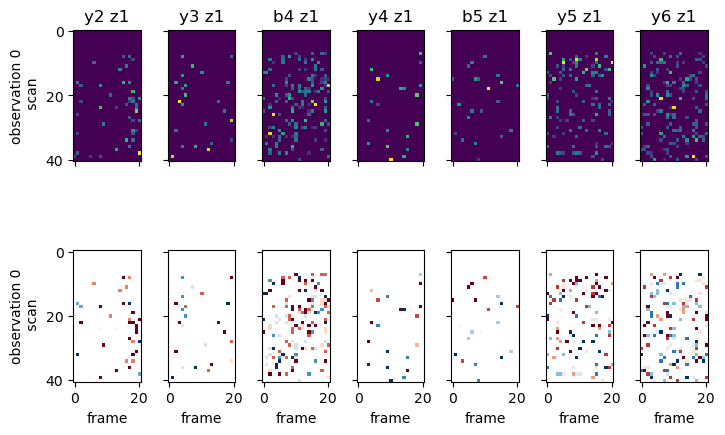

 50%|█████     | 5/10 [00:14<00:14,  2.85s/it]

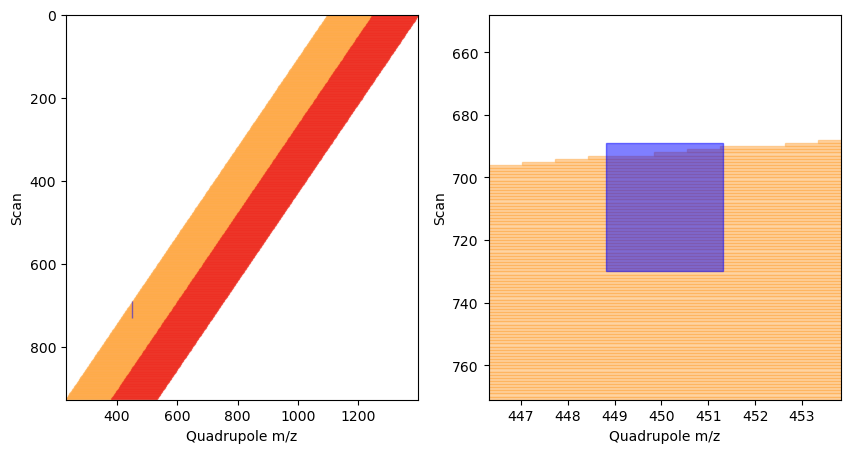

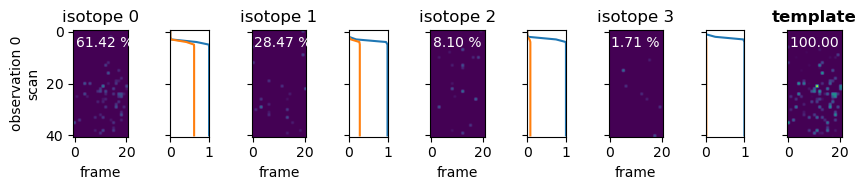

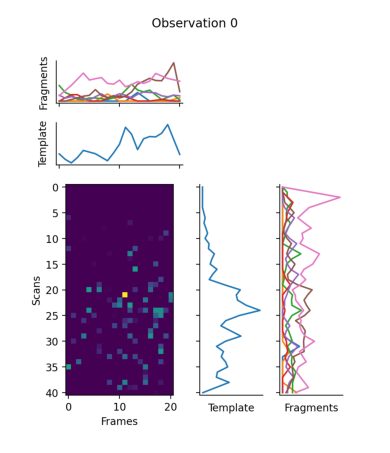

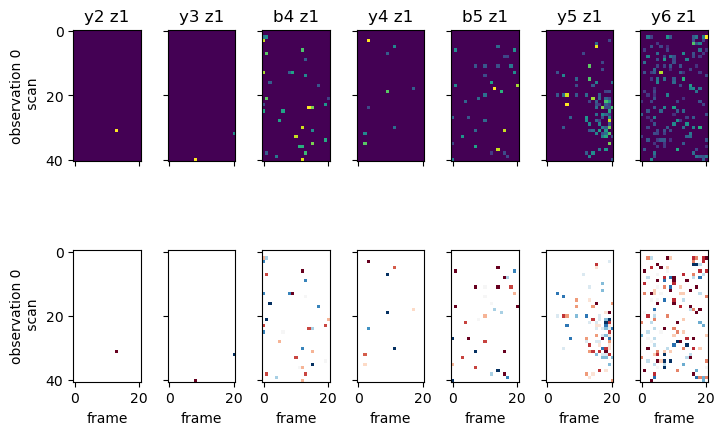

 60%|██████    | 6/10 [00:18<00:12,  3.01s/it]

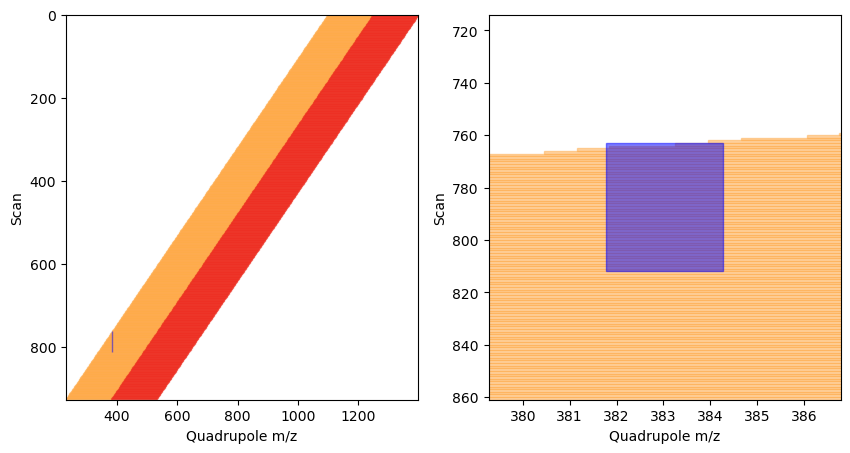

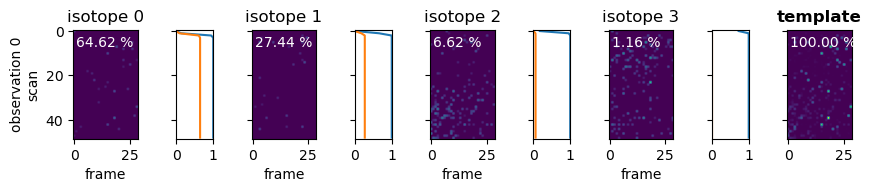

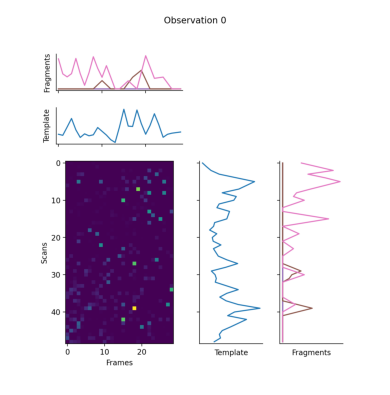

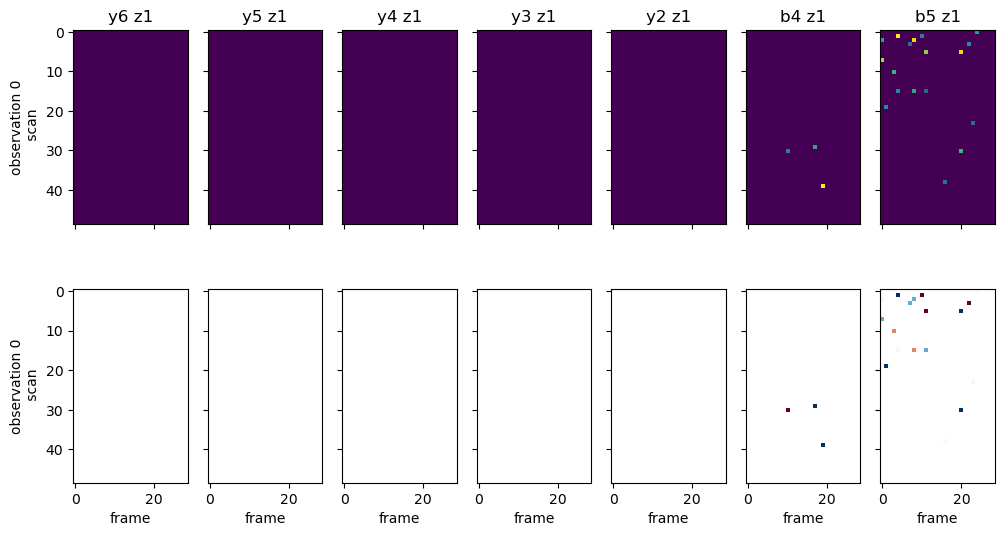

 70%|███████   | 7/10 [00:20<00:08,  2.86s/it]

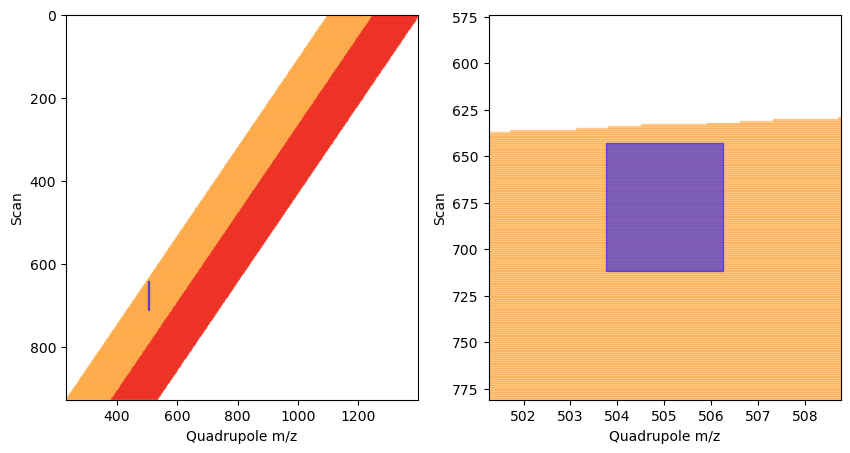

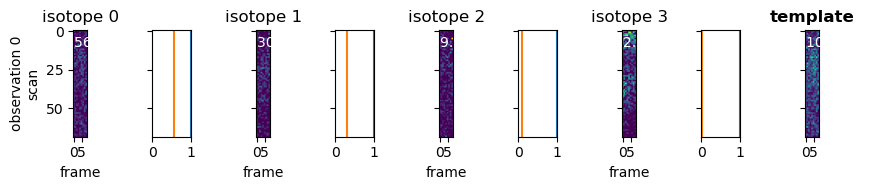

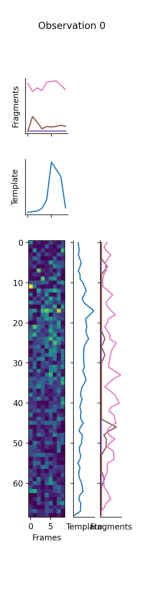

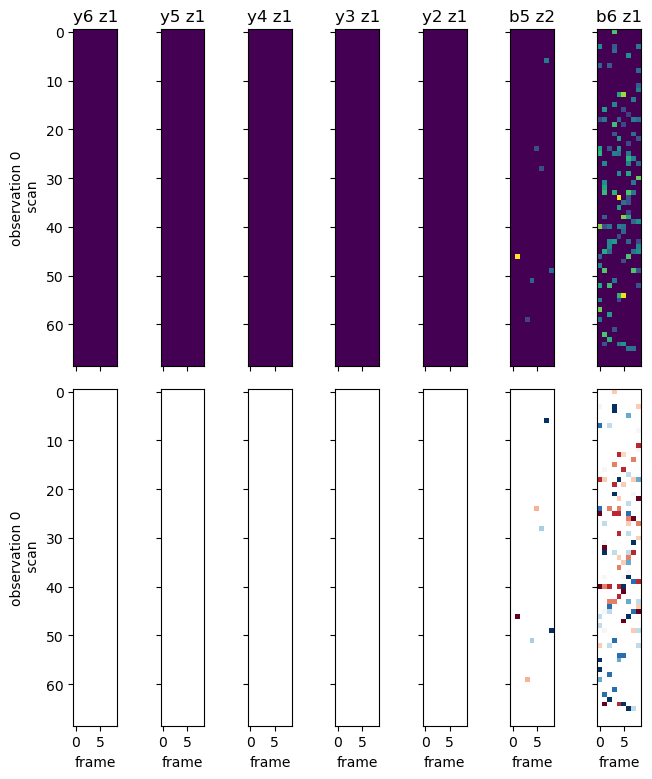

 80%|████████  | 8/10 [00:24<00:06,  3.01s/it]

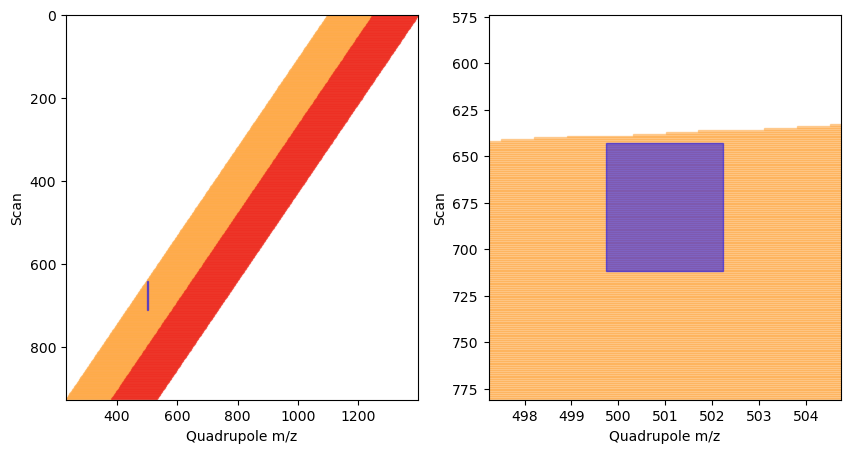

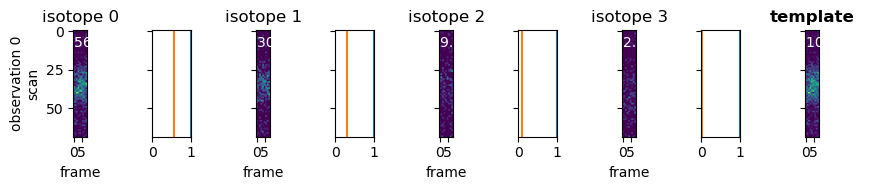

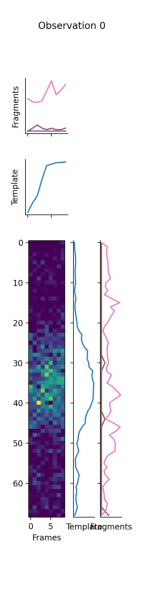

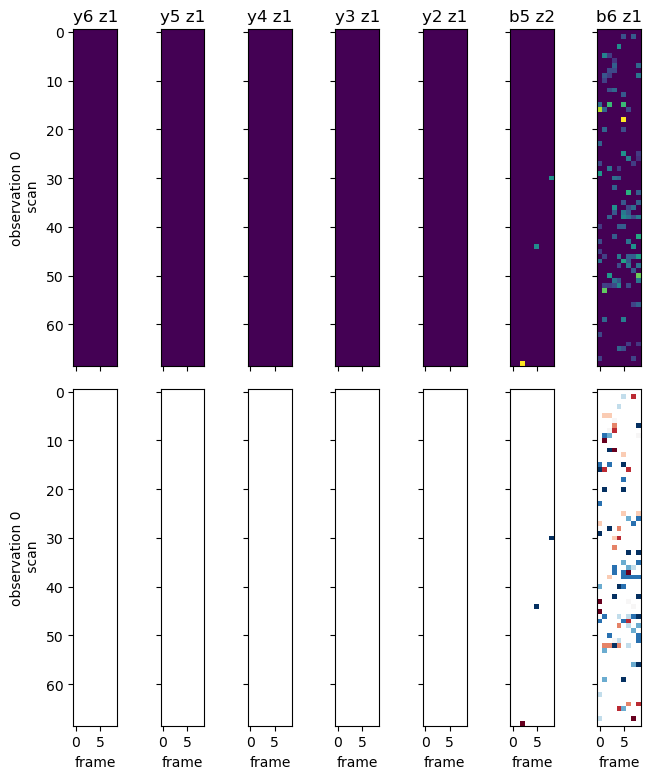

 90%|█████████ | 9/10 [00:27<00:03,  3.09s/it]

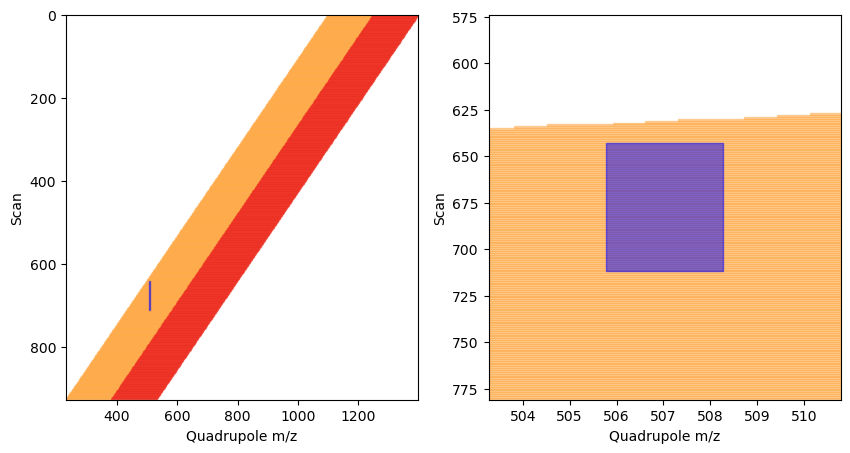

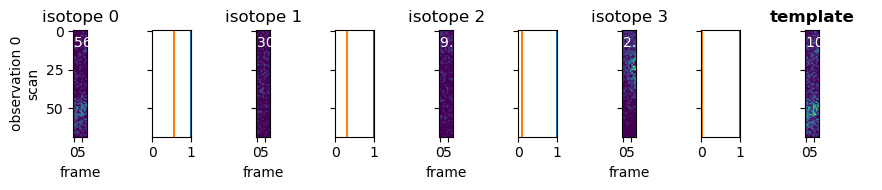

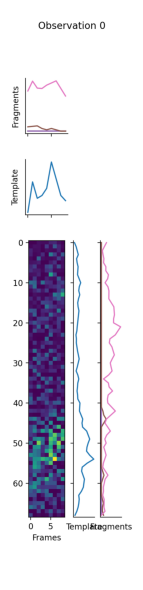

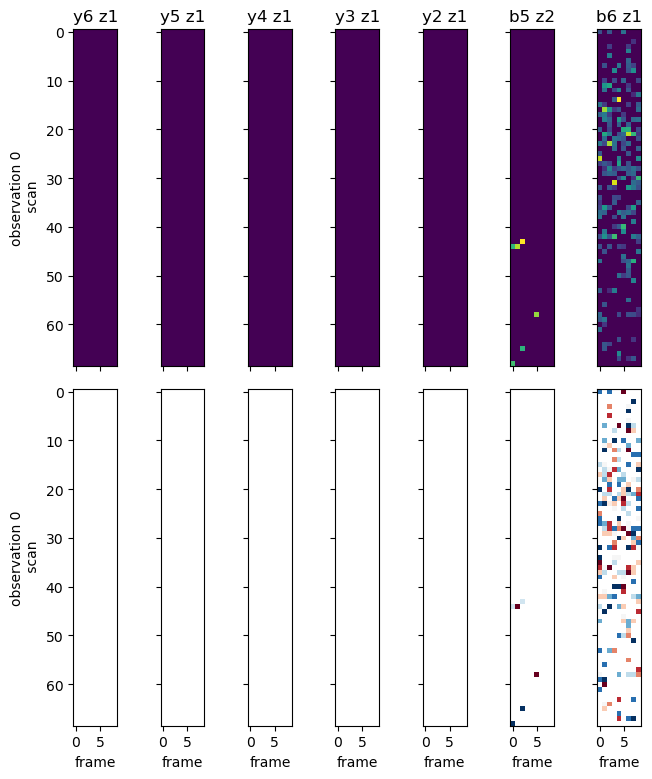

100%|██████████| 10/10 [00:29<00:00,  2.98s/it]


In [260]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_exclusive,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
psm = scoring_workflow()

In [233]:
psm_df, fragment_df = psm

In [241]:
psm_df.channel.value_counts()

0     27863
4     27735
8     27557
12    26642
Name: channel, dtype: int64

In [235]:
psm_df ['id'] = np.arange(len(psm_df))

In [236]:
psm_df = psm_df[(psm_df['decoy'] == 0) | (psm_df['channel'] == 12)].copy()

In [238]:
psm_df.loc[psm_df['channel'] == 12, 'decoy'] = 1

In [231]:
psm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
psm_df.dropna(how="all", inplace=True)

In [225]:
psm_df = psm_df.dropna().reset_index(drop=True).copy()
print(len(psm_df))

57868


In [232]:
# calculate the number of NA values per column
for c in psm_df.columns:
    print(c, psm_df[c].isna().sum())

precursor_idx 0
elution_group_idx 0
charge 0
rank 0
scan_start 0
scan_stop 0
scan_center 0
frame_start 0
frame_stop 0
frame_center 0
precursor_mass_error 0
mz_library 0
mz_observed 0
precursor_isotope_correlation 0
sum_precursor_intensity 0
n_fragments_matched 0
n_fragments 0
fraction_fragments 0
intensity_correlation 0
sum_fragment_intensity 0
mean_fragment_intensity 0
mean_fragment_nonzero 0
n_observations 0
mean_observation_score 0
var_observation_score 0
fragment_coverage 0
fragment_scan_correlation 0
fragment_frame_correlation 0
template_scan_correlation 0
template_frame_correlation 0
fwhm_rt 0
fwhm_mobility 0
sum_b_ion_intensity 0
sum_y_ion_intensity 0
observed_difference_b_y 0
expected_difference_b_y 51929
aggreement_b_y 51929
base_width_mobility 0
base_width_rt 0
rt_observed 0
mobility_observed 0
decoy 0
mz_calibrated 0
rt_library 0
rt_calibrated 0
rt_error 0
mobility_library 0
mobility_calibrated 0
mobility_error 0
proteins 0
channel 0
id 0


54505


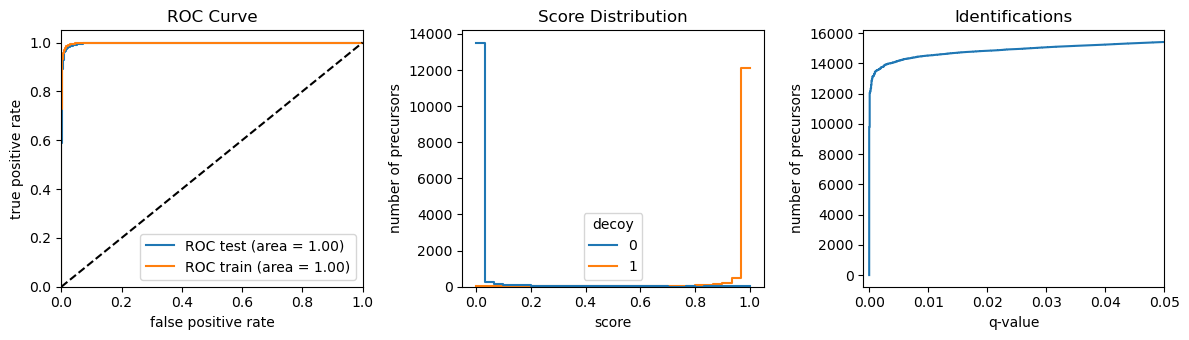

28596
(14384, 54)
3174
54377


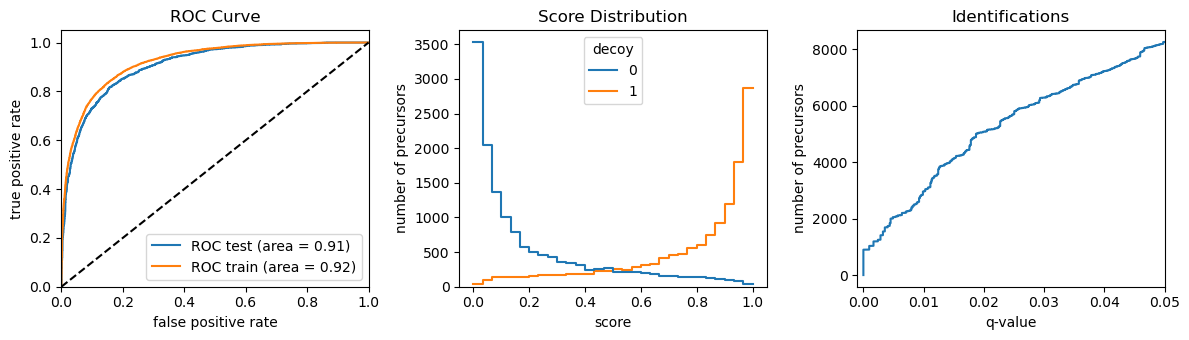

28511
(2934, 54)
1225
54199


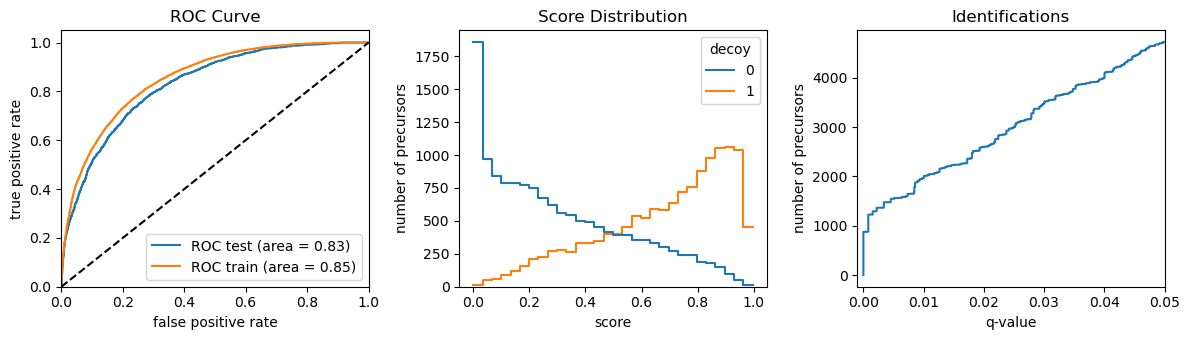

28388
(1948, 54)
818


In [240]:
from alphadia.extraction.scoring import fdr_correction

for channel in [0,4,8]:
    channel_psm_df = psm_df[psm_df['channel'].isin([channel, 12])]
    print(len(channel_psm_df))
    channel_psm_df = fdr_correction(channel_psm_df, index_group='id')
    print(len(channel_psm_df))
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)].shape)
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)]['proteins'].nunique())

In [75]:
d4_df_sig['proteins'].nunique()

1529

In [10]:
import time

performance = []

for mobility_window in [0.02, 0.03, 0.04, 0.05]:
    for rt_window in [10, 20, 30, 45, 60, 90, 120, 150, 180, 200, 250]:

        for i in range(10):

            config = hybridselection.HybridCandidateConfig()
            config.update({
                'rt_tolerance': rt_window,
                'mz_tolerance': 10.,
                'mobility_tolerance': mobility_window,
                'sigma_scale_rt': 0.5,
                'sigma_scale_mobility': 0.8,
                'f_mobility': 1.0,
                'f_rt': 0.95,
                'center_fraction': 0.01,
                'min_size_rt': 3,
                'candidate_count':3
            })

            start_time = time.time()
            selection = hybridselection.HybridCandidateSelection(
                dia_data,
                precursors_flat.sample(1000),
                fragments_flat,
                config.jitclass(),
                rt_tolerance=80,
                mz_tolerance=15,
                mobility_tolerance=0.05,
                candidate_count=1,
                thread_count=10,
                debug=False,
                group_channels=False,
                top_k_precursors=3,
                top_k_fragments=12,
                rt_column='rt_calibrated',
                precursor_mz_column='mz_calibrated',
                fragment_mz_column='mz_library',
                mobility_column='mobility_calibrated'
            )
            candidates = selection()
            stop_time = time.time()

            performance.append({
                'mobility_window': mobility_window,
                'rt_window': rt_window,
                'duration': stop_time - start_time
            })

0:17:21.478089  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:21.478498  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:21.478738  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:21.478967  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 8618.98it/s]
0:17:22.089936  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.090487  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.090732  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:22.090960  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 10741.94it/s]
0:17:22.487150  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.487524  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.487759  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80

In [17]:
performance_df = pd.DataFrame(performance)
path = '/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/slide_decks/2023_04_18_Borgwardt_Symposium/raw_data'

performance_df.to_csv(os.path.join(path, 'performance.tsv'), index=False, sep='\t')


In [22]:
performance_df['it/s'] = 1000 / performance_df['duration']
performance_df['mobility_window'] = performance_df['mobility_window']*2
performance_df['rt_window'] = performance_df['rt_window']*2

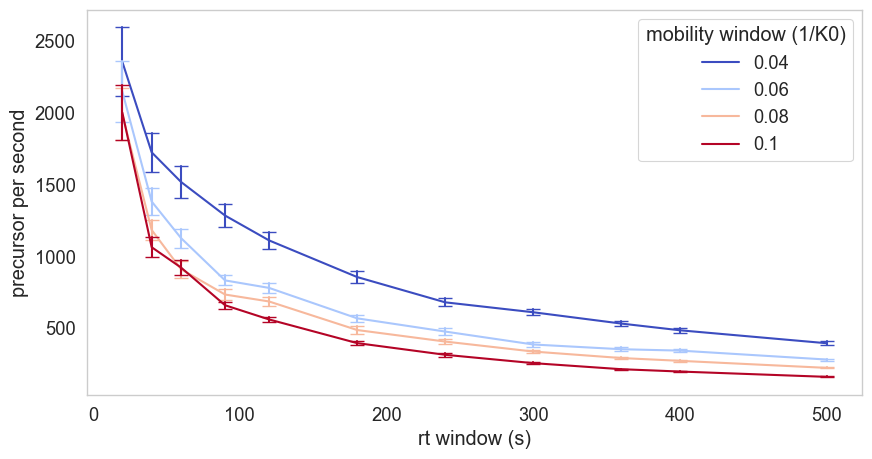

In [42]:
# plot the datapoints with error bars in seaborn
# remove the grid style
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=performance_df,
    x="rt_window",
    y="it/s",
    hue="mobility_window",
    err_style="bars", 
    errorbar=("se", 2),
    err_kws={'capsize':5},
    palette='coolwarm'
)
ax.set_xlabel('rt window (s)')
ax.set_ylabel('precursor per second')
plt.legend(title='mobility window (1/K0)')

fig.savefig(os.path.join(path, 'performance.png'), bbox_inches='tight', dpi=300)


In [15]:
size = 256*128
mflops = 4500

In [16]:
2*mflops/(5*size*np.log2(size))

0.003662109375

In [59]:
gaussian_filter = hybridselection.GaussianFilter(
            dia_data,
            kernel_size=20
        )

4:24:13.931934  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
4:24:13.932534  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
4:24:13.932885  INFO: Expected peak length in RT is 10.00 seconds, sigma is 3.61
4:24:13.933089  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20


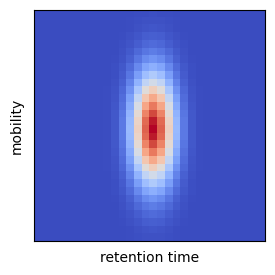

In [67]:


kernel = gaussian_filter.get_kernel()

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(kernel, cmap='coolwarm', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
fig.savefig(f'{path}/kernel.png', dpi=300)
plt.show()

In [36]:
features = []
decoy = []
rank = []
pidx = []

for eg in candidates:
    for c in eg.candidates:
        features.append(c.features)
        decoy.append(c.decoy)
        rank.append(c.rank)
        pidx.append(c.precursor_idx)
        
features = np.array(features)
decoy = np.array(decoy)
rank = np.array(rank)
pidx = np.array(pidx)

In [37]:
max_pidx = pidx.max()
candidate = pidx + max_pidx * rank

In [38]:
df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/HeLa full proteome/alpha_psms.tsv', sep='\t')

In [39]:
candidate_df = df['precursor_idx'].values + max_pidx * df['rank'].values

In [40]:
#mask = np.isin(candidate, candidate_df)

In [58]:
np.float_

numpy.float64

In [41]:
features_masked = features#[mask]
decoy_masked = decoy#[mask]
rank_masked = rank#[mask]
pidx_masked = pidx#[mask]


In [42]:
qval_mask = np.isin(pidx_masked, df[df['qval'] < 0.01]['precursor_idx'].values)

In [35]:
pidx_masked

array([330413, 330406, 287908, ..., 113298, 162935, 287896])

In [34]:
qval_mask.shape

(58193,)

In [43]:
qval_mask.sum()
len(qval_mask)

2088871

In [25]:
decoy.sum()

1039254

1307970


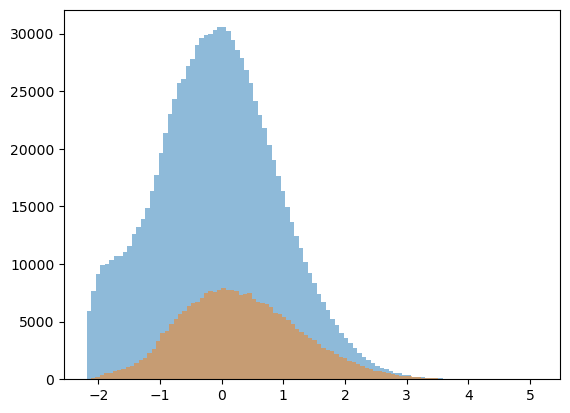

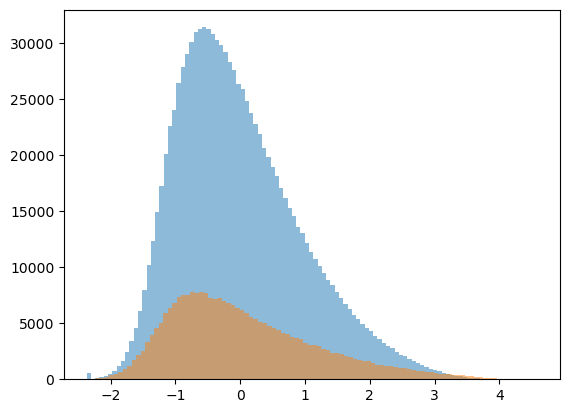

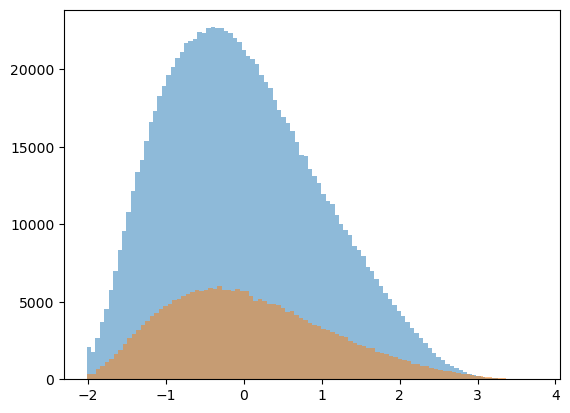

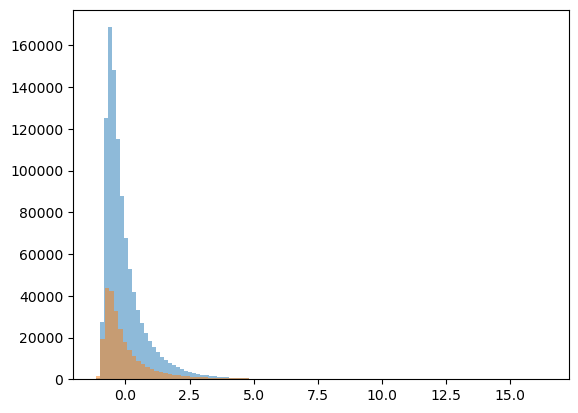

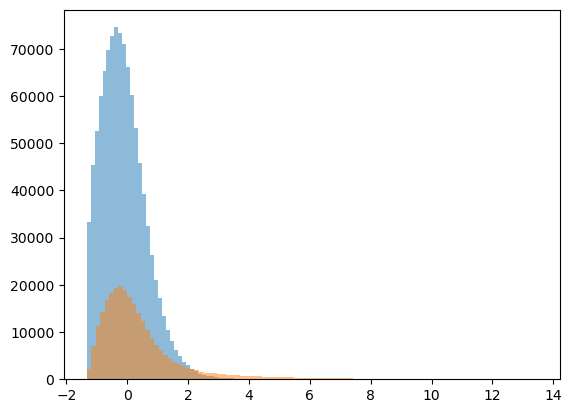

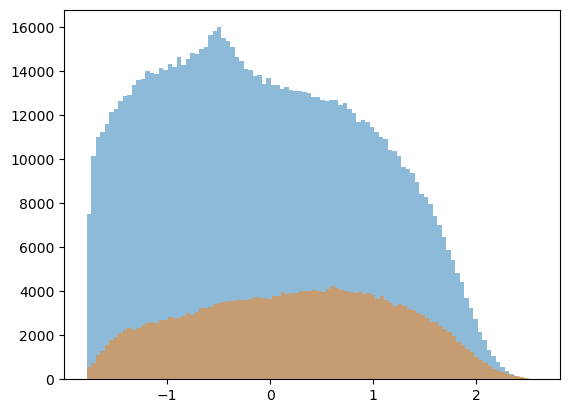

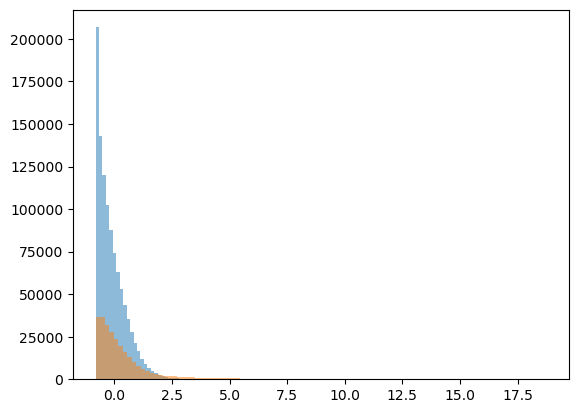

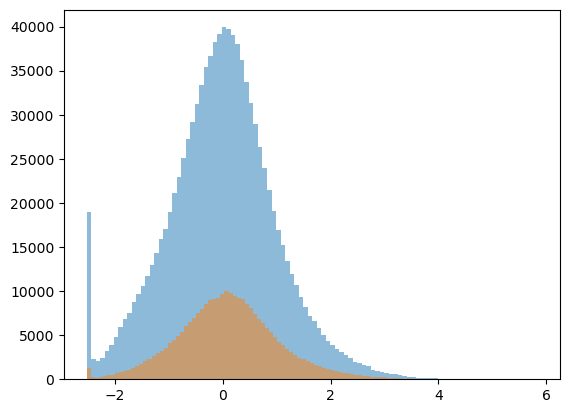

KeyboardInterrupt: 

In [45]:
from sklearn.linear_model import LogisticRegression


def train_classifier(features, decoy, qval_mask):
    # keep all decoys and targets within the qval mask
    to_keep = np.logical_or(decoy, qval_mask)
    features = features[to_keep]
    decoy = decoy[to_keep].astype(bool)

    print(len(features))

    mean = features.mean(axis=0, keepdims=True)
    std = features.std(axis=0, keepdims=True)

    # normalize features
    features = (features - mean)/std

    for i in range(features.shape[1]):
        plt.hist(features[decoy, i], bins=100, alpha=0.5, label='decoy')
        plt.hist(features[~decoy, i], bins=100, alpha=0.5, label='target')
        plt.show()

    # invert the decoy column
    decoy = ~decoy

    lr = LogisticRegression()
    lr.fit(features, decoy)
    print(lr.score(features, decoy))

    # print lr coefficients
    print(mean)
    print(std)
    print(lr.coef_)
    print(lr.intercept_)

train_classifier(features_masked, decoy_masked, qval_mask)


In [ ]:
0.7719351416881346
[[ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
   0.03138363  3.1453438 ]]
[[ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
   0.03225865  1.2671406 ]]
[[ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
   0.30102549  0.44892641]]
[-0.22941813]

In [110]:
features_masked[:,3] = np.log(features_masked[:,3]+0.0001)
features_masked[:,4] = np.log(features_masked[:,4]+0.0001)

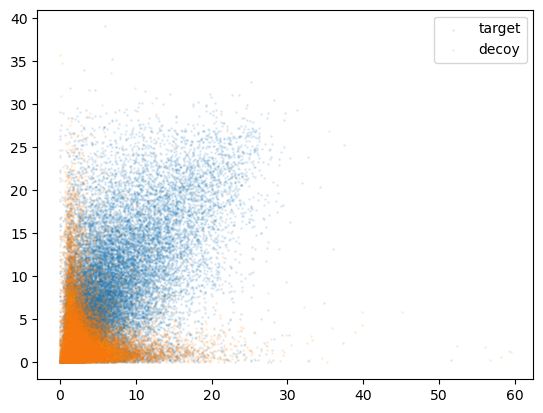

In [143]:
plt.scatter(features_masked[decoy_masked == 0,1], features_masked[decoy_masked == 0,6], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,1], features_masked[decoy_masked == 1,6], label='decoy', alpha=0.1, s=1)
plt.legend()

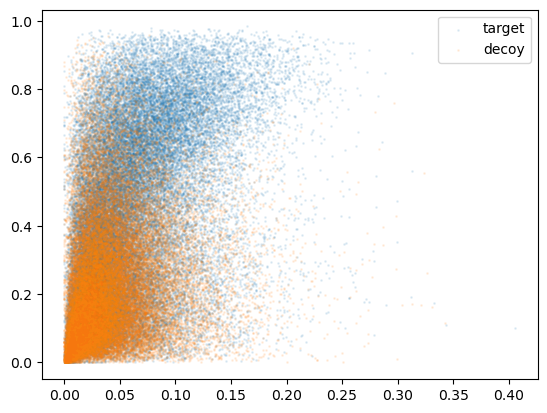

In [112]:
plt.scatter(features_masked[decoy_masked == 0,2], features_masked[decoy_masked == 0,7], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,2], features_masked[decoy_masked == 1,7], label='decoy', alpha=0.1, s=1)
plt.legend()

(array([9.400e+01, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.100e+01, 9.000e+00,
        1.000e+01, 1.900e+01, 1.400e+01, 2.700e+01, 2.400e+01, 2.300e+01,
        2.000e+01, 4.200e+01, 5.200e+01, 4.000e+01, 7.000e+01, 6.500e+01,
        9.200e+01, 1.090e+02, 1.640e+02, 1.730e+02, 1.750e+02, 2.730e+02,
        3.100e+02, 3.620e+02, 4.590e+02, 5.290e+02, 6.800e+02, 7.320e+02,
        9.150e+02, 1.063e+03, 1.318e+03, 1.451e+03, 1.692e+03, 1.928e+03,
        2.043e+03, 2.197e+03, 2.228e+03, 2.228e+03, 2.273e+03, 2.162e+03,
        2.125e+03, 1.793e+03, 1.773e+03, 1.569e+03, 1.396e+03, 1.252e+03,
        1.122e+03, 9.850e+02, 8.450e+02, 6.870e+02, 6.350e+02, 5.230e+02,
        4.510e+02, 3.550e+02, 3.250e+02, 2.470e+02, 1.930e+02, 1.630e+02,
        1.410e+02, 8.500e+01, 8.300e+0

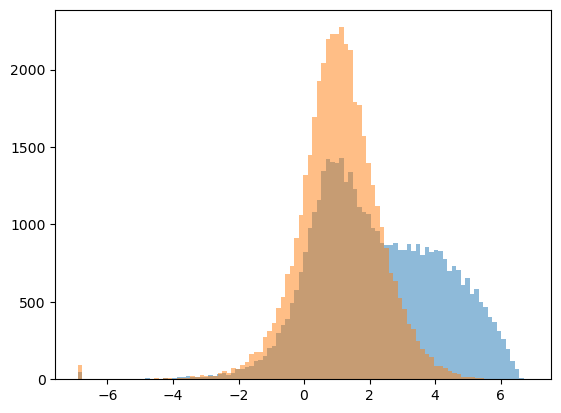

In [113]:
int_diff = np.log((features_masked[:,1] * features_masked[:,6])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

(array([178.,  83.,  53.,  49.,  59.,  58.,  59.,  59.,  52.,  63.,  41.,
         63.,  52.,  57.,  67.,  68.,  50.,  81.,  61.,  58.,  64.,  72.,
         71.,  81.,  84.,  82.,  69.,  76.,  82.,  97.,  81.,  70.,  94.,
         87., 104., 102., 116., 112., 100., 122.,  99.,  95., 104.,  91.,
         87.,  92., 109., 106.,  94., 103., 100., 101.,  83., 111.,  94.,
         91.,  92.,  79.,  76.,  79.,  56.,  61.,  64.,  66.,  55.,  59.,
         45.,  51.,  39.,  32.,  32.,  29.,  25.,  22.,  22.,  19.,  11.,
         12.,   9.,  12.,   9.,   8.,  10.,   3.,   4.,   3.,   5.,   5.,
          0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.9077554, -6.854499 , -6.8012424, -6.7479854, -6.694729 ,
        -6.6414723, -6.588216 , -6.534959 , -6.4817023, -6.428446 ,
        -6.3751893, -6.3219323, -6.268676 , -6.2154193, -6.162163 ,
        -6.108906 , -6.0556493, -6.002393 , -5.9491363, -5.8958793,
        -5.8426228, -5.7893662, -5.7361097, -5

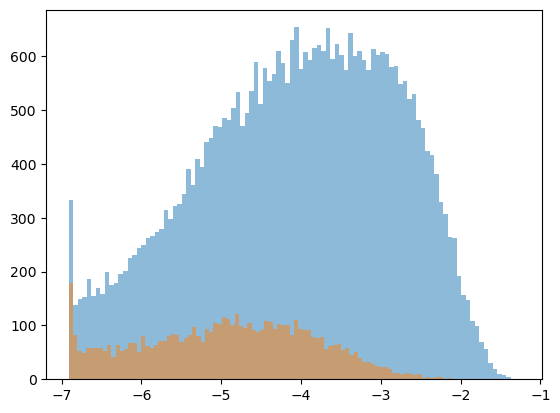

In [93]:
int_diff = np.log((features_masked[:,2] * features_masked[:,7])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

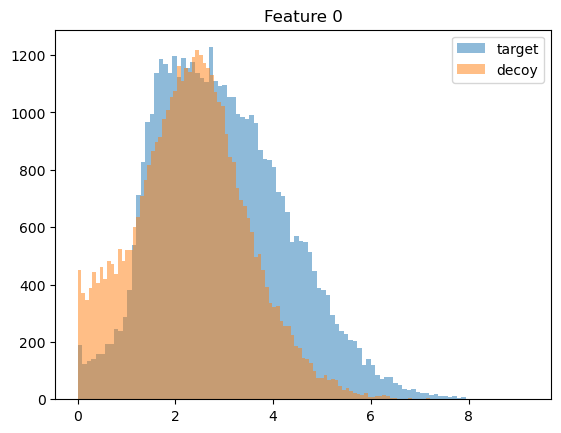

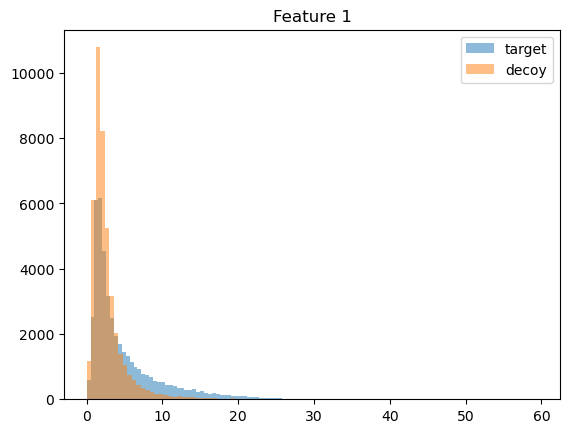

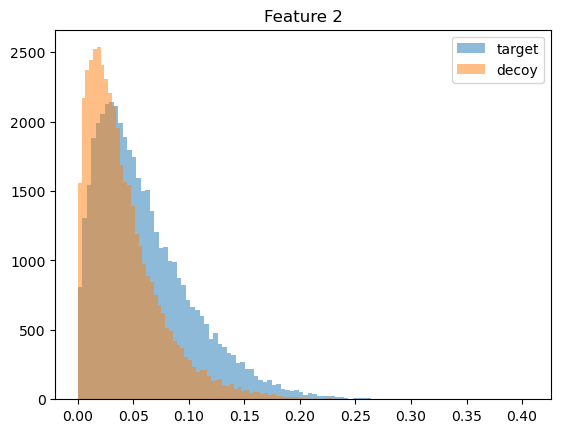

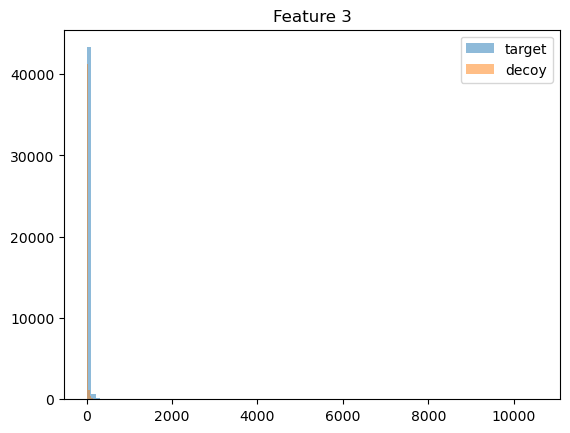

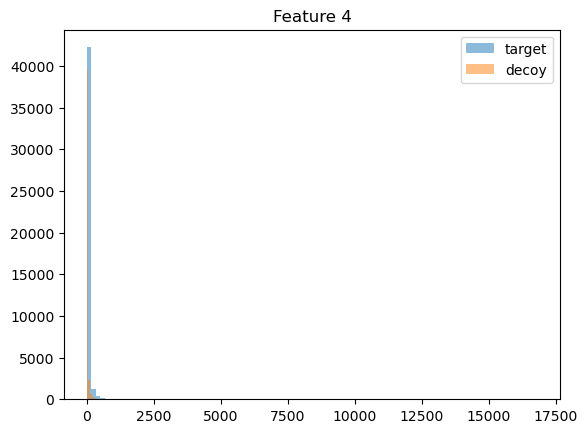

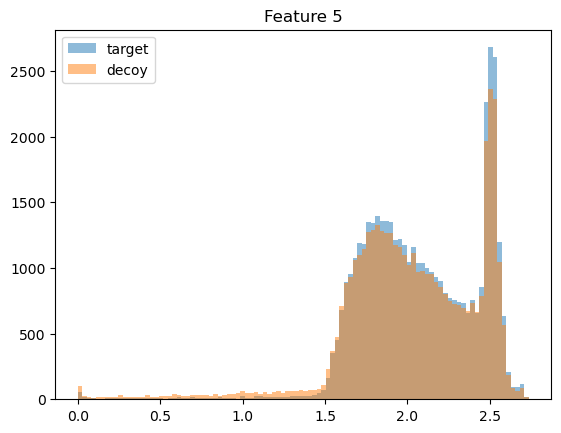

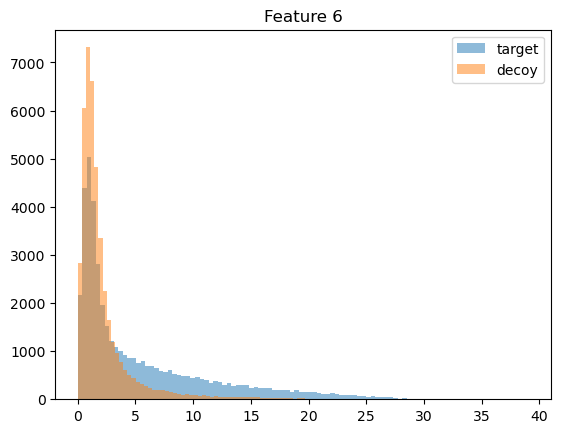

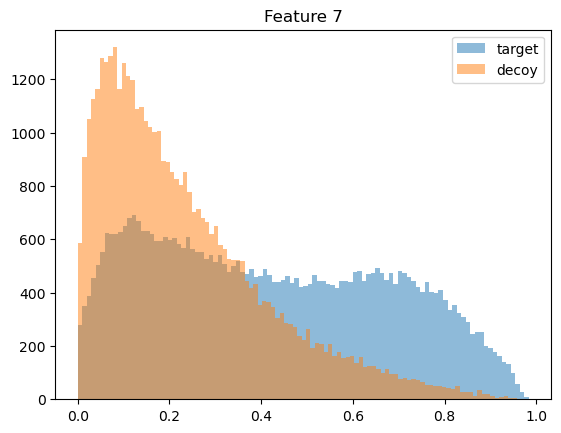

In [146]:
for i in range(features_masked.shape[1]):
    plt.figure()
    plt.hist(features_masked[decoy_masked == 0, i], label='target', bins=100, alpha=0.5)
    plt.hist(features_masked[decoy_masked == 1, i], label='decoy', bins=100, alpha=0.5)
    plt.legend()
    plt.title(f'Feature {i}')

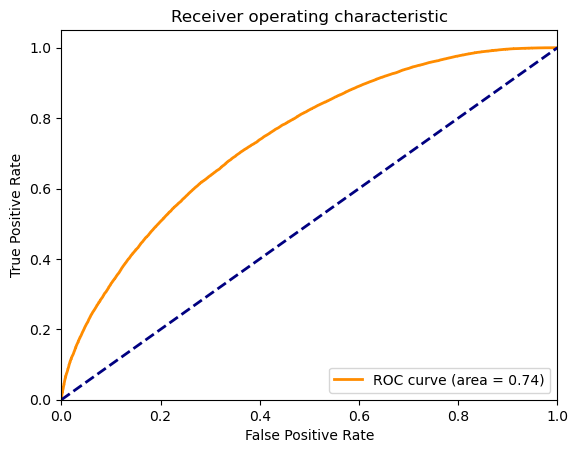

In [95]:
# train and validate a logistic regression model based on the features and decoy labels
from sklearn.linear_model import LogisticRegression
# MLP calssifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features_masked, decoy_masked, test_size=0.2, random_state=42)

sr = StandardScaler()
lr = MLPClassifier()

X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)


lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

# evaluiate the model by plotting the score distribution for the two classes (decoy and target)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(features.shape)

(414938, 8)


In [108]:
from alphadia.extraction import quadrupole
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [117]:
candidates['mz'] = candidates['precursor_mz']


  0%|          | 0/2 [00:00<?, ?it/s]

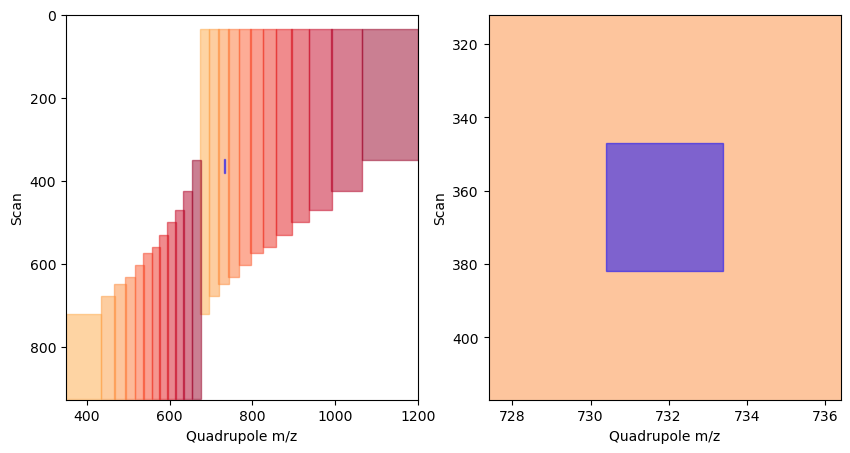

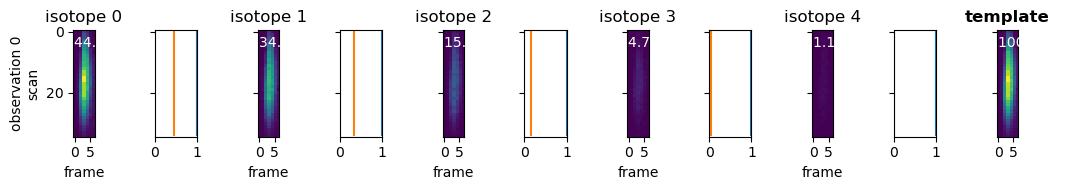

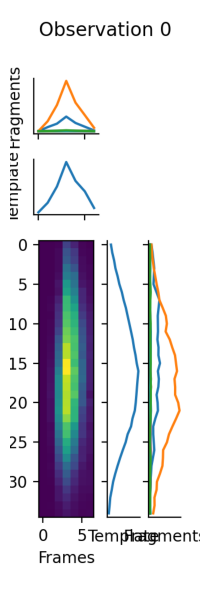

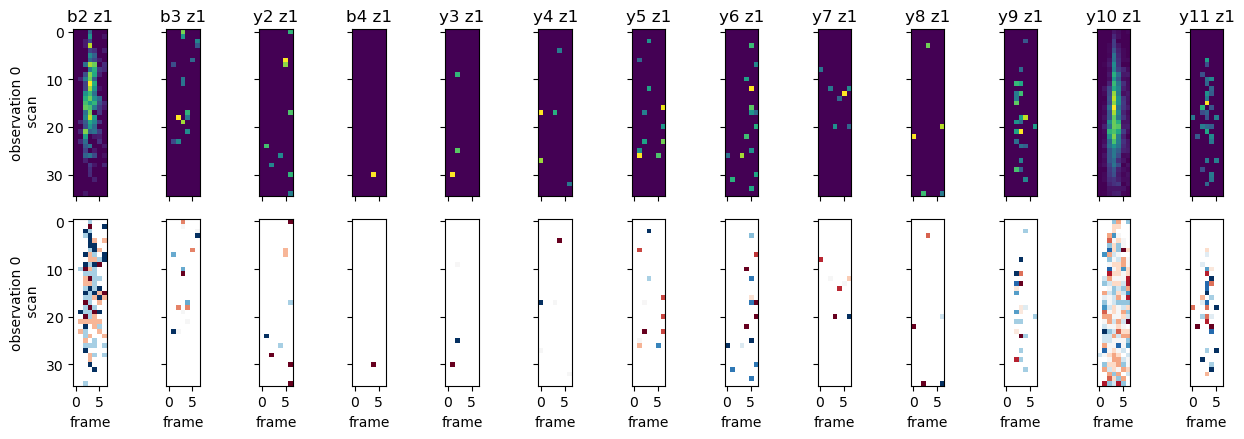

 50%|█████     | 1/2 [00:01<00:01,  1.28s/it]

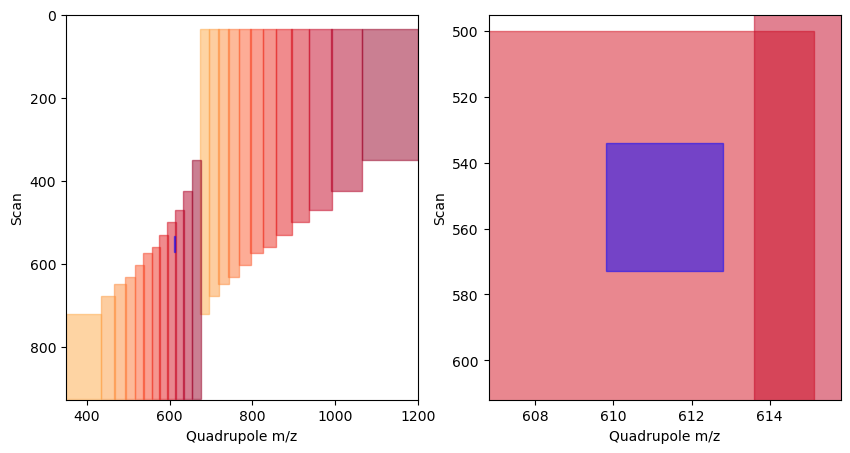

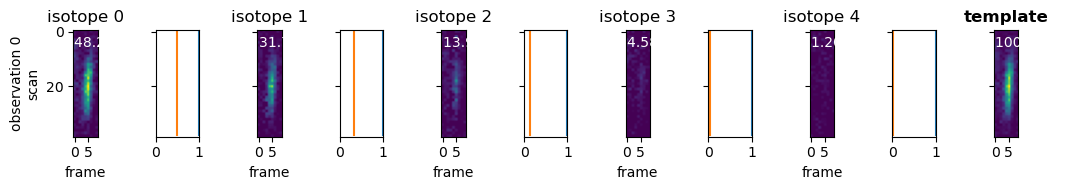

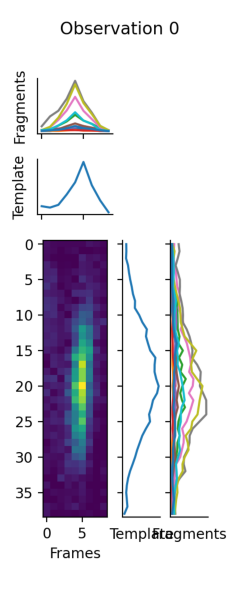

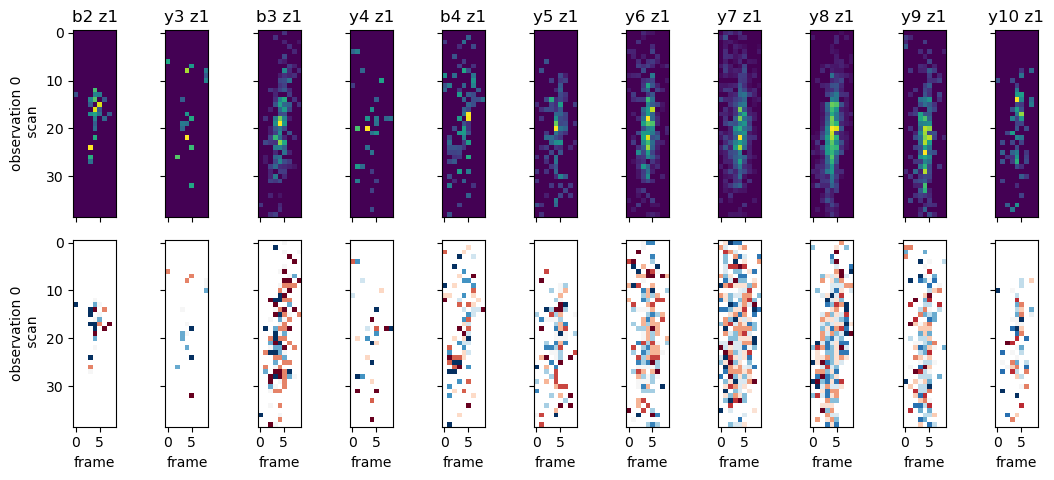

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


In [119]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow

workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    debug=True
)
psm = workflow()

In [111]:
psm

(   precursor_idx  elution_group_idx  charge  rank  precursor_mass_error  \
 0         230714                  2       2     0              2.743231   
 1         230714                  2       2     1              0.014830   
 2         230714                  2       2     2             -2.404601   
 3         230714                  2       2     3              1.964307   
 4         230715              76109       2     0              0.623978   
 5         230715              76109       2     1              0.971404   
 6         230715              76109       2     2              0.821897   
 7         230715              76109       2     3             -3.377354   
 8         230715              76109       2     4             -3.446375   
 
    mz_library  mz_observed  precursor_isotope_correlation  \
 0  730.896440   730.898438                       0.999893   
 1  730.896440   730.896423                       0.495449   
 2  730.896440   730.894653                       0.